In [2]:
import time
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

In [3]:
water_data = pd.read_csv(r'/home/bruno/Desktop/keorkle/Brain Reading/code/data/water_data.csv',usecols=['lambda', 'mu_a'])

In [4]:
# Load water absorption data
# df = pd.read_csv('/home/bruno/Desktop/keorkle/Brain Reading/code/data/water_data.csv', header=0)
df = pd.read_csv('/home/bruno/Desktop/keorkle/Brain Reading/code/data/ext_water.csv', header=0)
# Rename columns
# df = df.rename(columns={'mu_a': 'mu_a_water'}).drop(columns=['Unnamed: 0'])


# Define piecewise multiplier function
def skull_multiplier(lam):
    # lam in nm
    if lam <= 950:
        return 100
    elif lam <= 1400:
        return 10
    else:
        return 0.3

# Vectorize multiplier

multipliers = [skull_multiplier(lam) for lam in df['lambda']]


# Compute skull absorption
df['mu_a_skull'] = pd.DataFrame(   [mu * multipliers[i] for i,mu in enumerate(df['mu_a_water'])]    )


df = df.drop(columns=['Unnamed: 0'])

water_skull_data = df


water_skull_data.tail()

,lambda,mu_a_water,mu_a_skull
325,1.822326e+06,110.709126,33.212738
326,1.865207e+06,109.728960,32.918688
327,1.909097e+06,108.742021,32.622606
328,1.954020e+06,107.748686,32.324606
329,2.000000e+06,106.749326,32.024798


In [5]:
water_skull_data.head()

,lambda,mu_a_water,mu_a_skull
0,200.0,0.0690,6.90
1,225.0,0.0274,2.74
2,250.0,0.0168,1.68
3,275.0,0.0107,1.07
4,300.0,0.0067,0.67


In [102]:
freqs = water_skull_data['lambda'].to_numpy()
vals = water_skull_data['mu_a_water'].to_numpy()

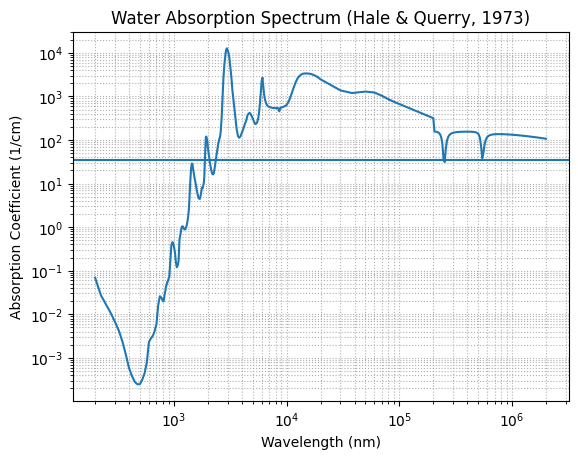

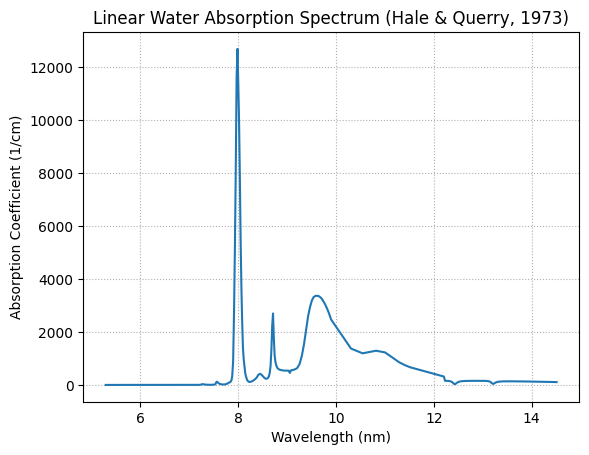

In [192]:
plt.loglog(freqs,vals)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.axhline(35)
plt.title('Water Absorption Spectrum (Hale & Querry, 1973)')
plt.grid(True, which='both', linestyle=':')
plt.show()


plt.plot([np.log(x) for x in freqs], vals)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.title('Linear Water Absorption Spectrum (Hale & Querry, 1973)')
plt.grid(True, which='both', linestyle=':')
plt.show()

In [64]:
water_skull_data.columns

Index(['lambda', 'mu_a_water', 'mu_a_skull'], dtype='object')

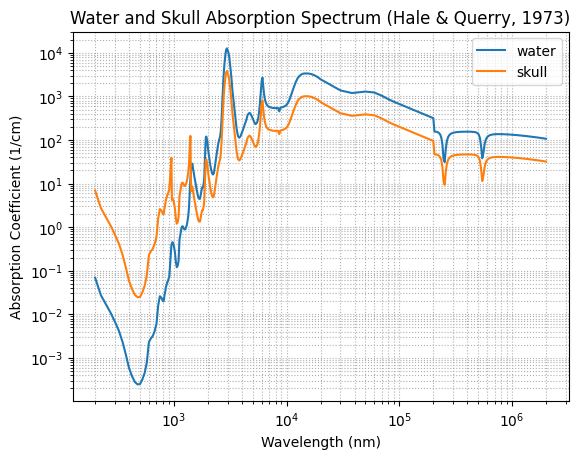

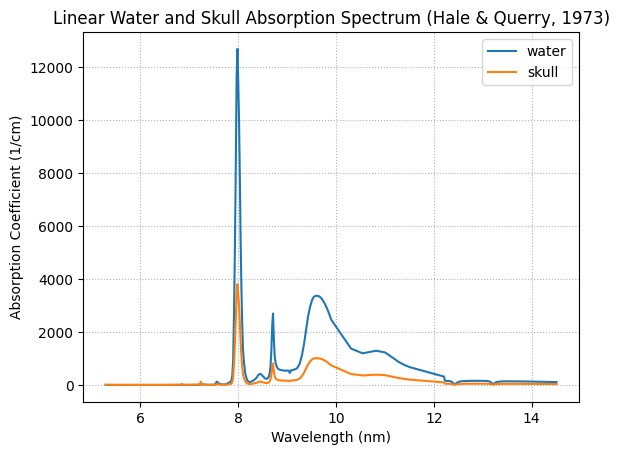

In [65]:
plt.loglog(water_skull_data['lambda'],water_skull_data['mu_a_water'], label='water')
plt.loglog(water_skull_data['lambda'],water_skull_data['mu_a_skull'], label='skull')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.legend()
plt.title('Water and Skull Absorption Spectrum (Hale & Querry, 1973)')
plt.grid(True, which='both', linestyle=':')
plt.show()


plt.plot([np.log(x) for x in water_skull_data['lambda']], water_skull_data['mu_a_water'], label='water')
plt.plot([np.log(x) for x in water_skull_data['lambda']], water_skull_data['mu_a_skull'], label='skull')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.legend()
plt.title('Linear Water and Skull Absorption Spectrum (Hale & Querry, 1973)')
plt.grid(True, which='both', linestyle=':')
plt.show()

### CURRENT MODEL

In [ ]:
def plot_spectrum(y, label = 'Max Detectable Depth mm', log = True):
    # your existing plot

    if log:
        plt.loglog(water_skull_data['lambda'], y, label=label)
        plt.loglog(water_skull_data['lambda'], water_skull_data['mu_a_water'], alpha=0.3)
    else:
        plt.plot(water_skull_data['lambda'], y, label=label)
        plt.plot(water_skull_data['lambda'], water_skull_data['mu_a_water'], alpha=0.3)



    

    # define band limits (all λ in nm)
    bands = {
        'VIS–NIR (650–950 nm)':   (650,   950,   'C0'),
        'SWIR (950–1450 nm)':     (950,  1450,   'C1'),
        'Mid-IR (1450–25000 nm)': (1450,25000,   'C2'),
        'Microwave (≥1 mm)':      (1e6,  1e7, 'C3'),
    }

    for name, (λ0, λ1, color) in bands.items():
        plt.axvspan(λ0, λ1, color=color, alpha=0.2, label=name)

    # horizontal lines at 1 mm and 2 mm
    plt.axhline(1.0, color='k', linestyle='--', linewidth=1, label='1 mm depth', alpha=0.4)
    plt.axhline(2.0, color='k', linestyle='-.', linewidth=1, label='2 mm depth', alpha=0.4)

    plt.axvline(1000000, color='b', linestyle='--', linewidth=1, label='1 mm lambda', alpha=0.4)
    plt.axvline(2000000, color='b', linestyle='-.', linewidth=1, label='2 mm lambda', alpha=0.4)

    plt.axvline(5500, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(3800, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(2188, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(750, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.xlabel('Wavelength (nm)')
    plt.ylabel(label)
    plt.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()

In [185]:
def get_thermal_coefficient(
    mu_a: float,
    rho: float = 1040,
    c_p: float = 3650
) -> float:
    """
    Compute thermal coefficient for brain tissue that converts irradiance to
    heating rate (dT/dt) per unit irradiance [K per (W/m²·s)].

    Parameters
    ----------
    mu_a : float
        Absorption coefficient at the wavelength of interest [m⁻¹].
    rho : float
        Tissue density [kg/m³]. Default ~1040 for brain.
    c_p : float
        Specific heat capacity [J/(kg·K)]. Default ~3650 for brain.

    Returns
    -------
    thermal_coeff : float
        Heating rate per irradiance [K/(W/m²·s)].
    """
    # dT/dt = mu_a * I / (rho * c_p)  => thermal_coeff = mu_a/(rho*c_p)
    return mu_a / (rho * c_p)



def max_detectable_depth(
    I0: float,
    exposure_time: float,
    mu_a_brain: float,
    skull: bool = False,
    mu_a_skull: float = None,
    skull_thickness_mm: float = 6,
    NEP: float = 1e-14,
    pulse_snr_boost: float = None,
    threshold_signal: float = None
) -> dict:
    """
    Estimate the maximum one-way brain depth at which a returned optical signal
    remains above the detection threshold of a modern photodetector.

    Parameters
    ----------
    I0 : float
        Incident irradiance (power per area) on tissue [W/m²].
    exposure_time : float
        Total exposure/integration time [s].
    mu_a_brain : float
        Brain absorption coefficient at the wavelength of interest [m⁻¹].
    skull : bool, optional
        Whether to include skull attenuation (default: False).
    mu_a_skull : float, optional
        Skull absorption coefficient [m⁻¹] (required if skull=True).
    skull_thickness_mm : float, optional
        Skull thickness [mm] (required if skull=True).
    NEP : float, optional
        Noise Equivalent Power of detector [W/√Hz] (default 1e-12 W/√Hz citeturn0search4).
    threshold_signal : float, optional
        Absolute minimum detectable signal energy per unit area [J/m²].
        If None, computed from NEP and exposure_time:
            noise_bandwidth ≈ 1 / exposure_time  [Hz]
            threshold_power = NEP * √noise_bandwidth  [W/m²]
            threshold_signal = threshold_power * exposure_time  [J/m²]

    Returns
    -------
    dict
        - max_depth_mm: maximum detectable one-way depth [mm]
        - threshold_signal_J_m2: signal-energy threshold used [J/m²]
        - F_skull: round-trip skull transmission factor (if skull=True)
        - status: "OK" or reason why no detection possible
    """
    # Compute or validate threshold_signal [J/m²]
    if threshold_signal is None:
        # Approximate noise-equivalent minimum detectable power [W/m²]
        noise_bandwidth = 1.0 / exposure_time
        threshold_power = NEP * np.sqrt(noise_bandwidth)
        threshold_signal = threshold_power * exposure_time

    if pulse_snr_boost is not None:
        threshold_signal   = threshold_signal / pulse_snr_boost
                

    # Compute round-trip skull factor
    F_skull = 1.0
    if skull:
        if mu_a_skull is None or skull_thickness_mm is None:
            raise ValueError("mu_a_skull and skull_thickness_mm must be set if skull=True.")
        skull_thickness_m = skull_thickness_mm * 1e-3
        # Round-trip through skull
        F_skull = np.exp(-2 * mu_a_skull * skull_thickness_m)

    # Compute total incident energy per area
    E_incident = I0 * exposure_time  # [J/m²]

    # Check if any detection is possible
    if E_incident * F_skull <= threshold_signal:
        return {
            "max_depth_mm": 0.0,
            "threshold_signal_J_m2": threshold_signal,
            "F_skull": F_skull,
            "status": "No depth: incident×skull < threshold"
        }

    # Solve for depth: E_signal(depth) = E_incident * F_skull * exp(-2 μ_a_brain d) ≥ threshold_signal
    # ⇒ exp(-2 μ_a_brain d) ≥ threshold_signal / (E_incident * F_skull)
    frac_required = threshold_signal / (E_incident * F_skull)
    max_depth_m = -np.log(frac_required) / (2 * mu_a_brain)
    max_depth_mm = max_depth_m * 1e3

    return {
        "max_depth_mm": max_depth_mm,
        "threshold_signal_J_m2": threshold_signal,
        "F_skull": F_skull,
        "status": "OK"
    }


def optimize_pulse_schedule(
    wavelength: float,
    amplitude_grid: np.ndarray,
    mu_a_brain: float,
    pulse_freq_grid = np.logspace(3, 9, 50),
    pulse_duration_grid= np.logspace(-14, -9, 50),
    skull: bool = False,
    mu_a_skull: float = None,
    skull_thickness_mm: float = None,
    NEP: float = 1e-12,
    arrhenius_threshold: float = 0.00321,
    arrhenius_threshold_pulse: float = None,
    max_stimulation_per_trial: float = 8.,
    tau_brain: float = 2.,
    verbose: bool = False,
    num_loops: int = None
) -> dict:
    """
    Optimize pulse amplitude & repetition rate for maximum penetration depth
    under an Arrhenius damage limit, accounting for wavelength-specific
    absorption in thermal modeling.

    Parameters
    ----------
    wavelength : float
        Laser wavelength (m).
    amplitude_grid : array-like
        Photon flux values to test [photons/m²/s].
    pulse_freq_grid : array-like
        Laser repetition rates to test (Hz).
    duty : float
        Fraction of each cycle the laser is ON (0 < duty ≤ 1).
    mu_a_brain : float
        Brain absorption coefficient at this wavelength [m⁻¹].
    skull, mu_a_skull, skull_thickness_mm, NEP : see depth function.
    arrhenius_threshold : float
        Maximum allowed Arrhenius damage integral Ω.
    max_time : float
        Upper cap on exposure time (s).

    Returns
    -------
    dict
        {
          'optimal_amplitude': float,  # photon flux
          'optimal_freq': float,       # Hz
          'optimal_duty': float,
          'max_exposure_time': float,
          'max_depth_mm': float,
          'omega': float
        }
    """
    if arrhenius_threshold_pulse is None:
        arrhenius_threshold_pulse = arrhenius_threshold



    best = {
        'optimal_amplitude': None,
        'optimal_freq':      None,
        'max_exposure_time': 0.0,
        'max_depth_mm':      0.0,
        'omega':             None,
        'max_cycles':          0,
        'max_time':            0
    }

    Ω_threshold = arrhenius_threshold
    Ω_threshold_pulse = arrhenius_threshold_pulse

    # Photon energy (J per photon)
    E_photon      = h * c / wavelength
    thermal_coeff = get_thermal_coefficient(mu_a_brain)

    idx_max = len(amplitude_grid) * len(pulse_freq_grid) * len(pulse_duration_grid)
    # Sweep amplitude and repetition rate
    for amplitude in amplitude_grid:

        I0_peak = amplitude * E_photon  # surface irradiance [W/m²]

        for freq in pulse_freq_grid:

            for idx, pulse_dt in enumerate(pulse_duration_grid):

                if idx == 0 and verbose:
                    before = time.time()

                # Compute pulse on-time
                if pulse_dt * freq > 1:
                    print('A pulse duration is too long to fit a second a the given freq')
                    continue

                average_time_on   = pulse_dt * freq         # s

                # Average Irradiance at brain surface
                I0_avg = I0_peak * average_time_on  

                dT_peak = I0_peak * thermal_coeff

                T_pulse_increase = dT_peak * pulse_dt

              

                T0 = 309.85

                T = T0

                # dt_off = (freq * pulse_dt) / (freq-1)

                period = 1.0/freq
                dt_off = period - pulse_dt


                N_max = max_stimulation_per_trial * freq

                t_max = 0

                Ω_pulse = 0

                #for cycle in range(int(N_max)):
                for cycle in range(int(1000)):

                    # 1) Heat: assume nearly constant T during the short on‐pulse
                   
                    T += T_pulse_increase

                    t_max += pulse_dt
                    
                    # Integrate Arrhenius over the on‐time
                    k_on = A_arr * exp(-Ea_arr/(R_gas * T))  #TODO check R gas
                    Ω_pulse += k_on * pulse_dt
                    
                    # Break if damage limit reached
                    if Ω_pulse >= Ω_threshold_pulse:
                        break
                    
                    # 2) Cool during the off‐time (exponential decay toward baseline)
                    T = T0 + (T - T0) * exp(-dt_off / tau_brain)
                
                max_cycles = Ω_threshold / Ω_pulse

                snr_boost   = np.sqrt(N_max)

                # Compute penetration depth
       
                res   = max_detectable_depth(
                    I0_avg, t_max, mu_a_brain,  # Should I use I0_avg here or something else?
                    skull, mu_a_skull, skull_thickness_mm,
                    NEP, snr_boost
                )
                depth = res['max_depth_mm']
         

                # Update if improved
                if depth > best['max_depth_mm']:
                    best.update({
                        'optimal_amplitude': amplitude,
                        'optimal_freq':      freq,
                        'max_exposure_time': t_max,
                        'max_depth_mm':      depth,
                        'omega':             Ω_pulse,
                        'max_cycles':       max_cycles,
                        'max_time':         max_cycles * max_stimulation_per_trial
                    })

                if idx == 0 and verbose:
                    comp_duration = time.time() - before
                    print(f"Cycle duration is {comp_duration} seconds")

                    print(f"Expected total compute duration is {idx_max * comp_duration * num_loops // 60 / 60} hours, or {idx_max * comp_duration * num_loops // 60 } minutes")
                    verbose = False

    return best

In [186]:
# Physical constants
h = 6.62607015e-34  # Planck constant, J·s
c = 2.99792458e8    # Speed of light, m/s

# Tissue baseline temperature
T0 = 310.15         # K (37 °C)

# Arrhenius parameters (example values)
A_arr = 3.1e98      # s⁻¹ (frequency factor)
Ea_arr = 6.28e5     # J/mol (activation energy)
R_gas = 8.314       # J/(mol·K)



amplitude_grid = np.logspace(18, 25, 6)
pulse_freq_grid = np.logspace(3, 9, 5)
pulse_duration_grid= np.logspace(-14, -9, 5)

arrhenius_threshold = 0.00321 # Equivalent to CEM 43 degrees Celsius for 10 minutes

arrhenius_threshold_pulse = arrhenius_threshold / 100

max_stimulation_per_trial = 8

tau_brain = 2

results = []

verbose = True
num_wavelengths = len(water_skull_data['lambda'])
for i, (wavelength, mu_water, mu_skull) in enumerate(water_skull_data.values):

    if i==0: before = time.time()

    result = optimize_pulse_schedule(wavelength=wavelength, amplitude_grid=amplitude_grid,
                                      mu_a_brain=mu_water*100,
                                      pulse_freq_grid = pulse_freq_grid,
                                      pulse_duration_grid = pulse_duration_grid,
                                      skull = True, mu_a_skull=mu_skull*100, skull_thickness_mm=6,
                                      NEP=1e-14,
                                      arrhenius_threshold=arrhenius_threshold, arrhenius_threshold_pulse=arrhenius_threshold_pulse,
                                      max_stimulation_per_trial = max_stimulation_per_trial,
                                      tau_brain = tau_brain, verbose = verbose, num_loops = num_wavelengths)

    results.append(result)
    verbose = False

    if i==0:
        duration = time.time() - before
        print(f"More accurate duration estimate is {duration} seconds per wavelength, {duration*num_wavelengths //60 } minutes \
               or {duration*num_wavelengths //60 / 60} hours in total.")
    

depths = [result['max_depth_mm'] for result in results]

exposures = [result['max_exposure_time'] for result in results]


'''
best.update({
  'optimal_amplitude': amplitude,
  'optimal_duty': duty,
  'max_exposure_time': t_run,
  'max_depth_mm': depth,
  'omega': omega_val
})
'''


Cycle duration is 0.0025315284729003906 seconds
Expected total compute duration is 0.03333333333333333 hours, or 2.0 minutes
More accurate duration estimate is 0.10155200958251953 seconds per wavelength, 0.0 minutes                or 0.0 hours in total.


"\nbest.update({\n  'optimal_amplitude': amplitude,\n  'optimal_duty': duty,\n  'max_exposure_time': t_run,\n  'max_depth_mm': depth,\n  'omega': omega_val\n})\n"

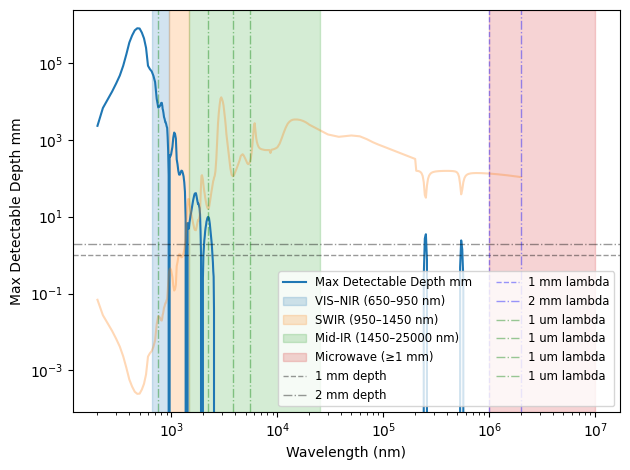

In [85]:
plot_spectrum(depths)

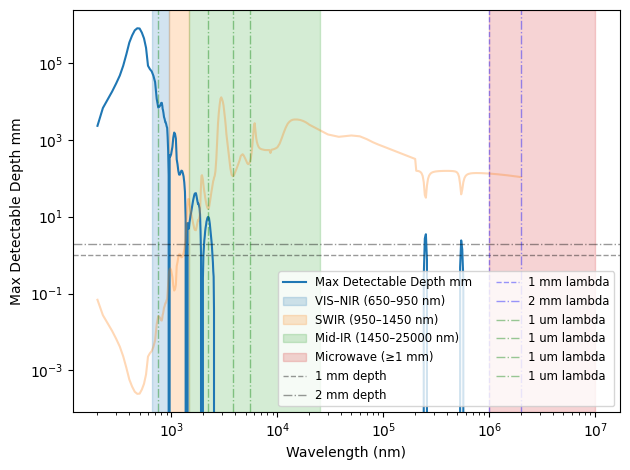

In [74]:
plot_spectrum(depths) # 1.5mm

In [231]:
import os
from concurrent.futures import ProcessPoolExecutor, as_completed

# 1. Figure out how many logical CPUs (hardware threads) you have:
max_workers = os.cpu_count() 

max_workers

16

In [ ]:
import os
from concurrent.futures import ProcessPoolExecutor, as_completed

# 1. Figure out how many logical CPUs (hardware threads) you have:
max_workers = os.cpu_count()   # e.g. 16 on a 8‑core/16‑thread machine
print(f"Detected {max_workers} logical CPUs")
amplitude_grid = np.logspace(18, 25, 8)
pulse_freq_grid = np.logspace(3, 9, 8)
pulse_duration_grid= np.logspace(-14, -9, 8)
# 2. Build the list of argument‑dicts you want to map:
tasks = []
for wavelength, mu_water, mu_skull in water_skull_data.values:
    tasks.append({
        'wavelength': wavelength,
        'amplitude_grid': amplitude_grid,
        'mu_a_brain': mu_water * 100,
        'pulse_freq_grid': pulse_freq_grid,
        'pulse_duration_grid': pulse_duration_grid,
        'skull': True,
        'mu_a_skull': mu_skull * 100,
        'skull_thickness_mm': 5.5,
        'NEP': 1e-14,
        'arrhenius_threshold': arrhenius_threshold,
        'arrhenius_threshold_pulse': arrhenius_threshold_pulse,
        'max_stimulation_per_trial': max_stimulation_per_trial,
        'tau_brain': tau_brain,
        'verbose': False,
        'num_loops': len(water_skull_data['lambda'])
    })

# 3. Spawn a pool of worker processes:
with ProcessPoolExecutor(max_workers=14) as executor:
    futures = [executor.submit(optimize_pulse_schedule, **kw) for kw in tasks]

    results = []
    for future in as_completed(futures):
        try:
            results.append(future.result())
        except Exception as e:
            print("Worker raised:", e)
depths = [result['max_depth_mm'] for result in results]

exposures = [result['max_exposure_time'] for result in results]

times = [result['max_time'] for result in results]

Detected 16 logical CPUs


In [197]:
depths = [result['max_depth_mm'] for result in results]

exposures = [result['max_exposure_time'] for result in results]

times = [result['max_time'] for result in results]

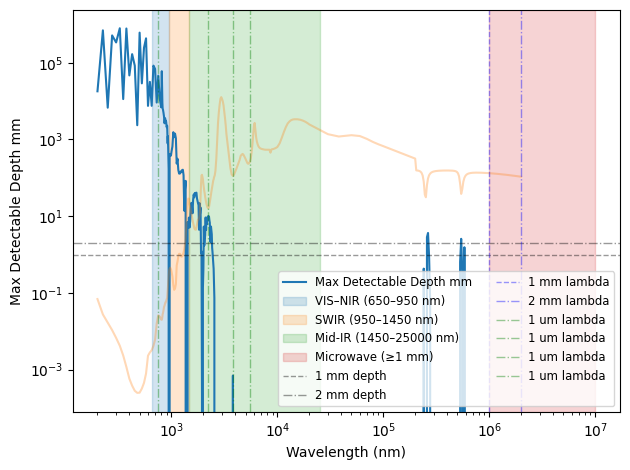

In [94]:
plot_spectrum(depths)

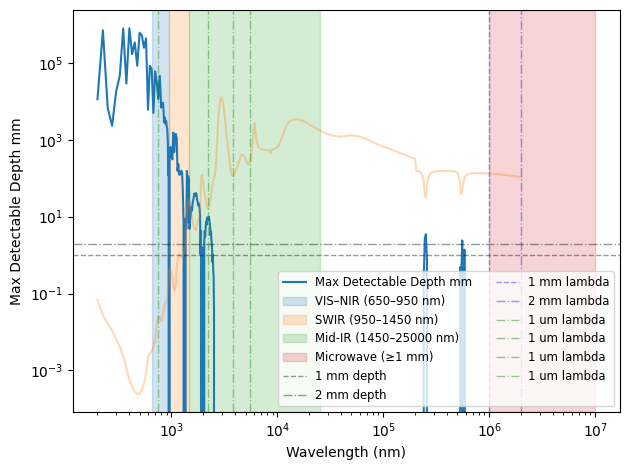

In [88]:
plot_spectrum(depths)

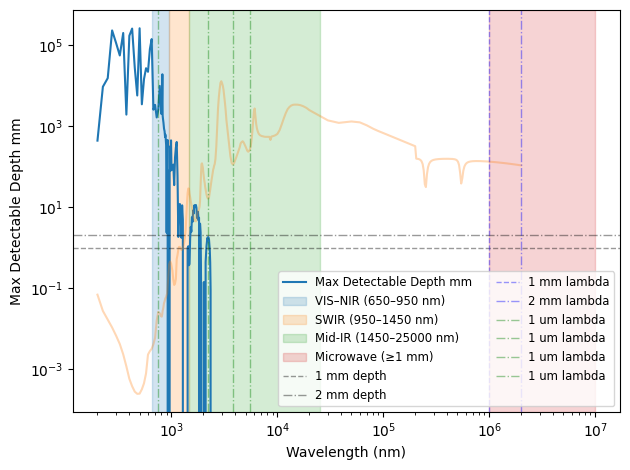

In [83]:
plot_spectrum(depths) # 5.5mm

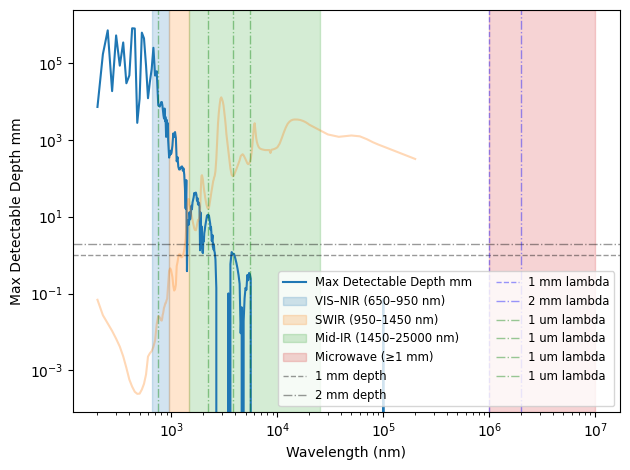

In [252]:
plot_spectrum(depths) # 1.5mm

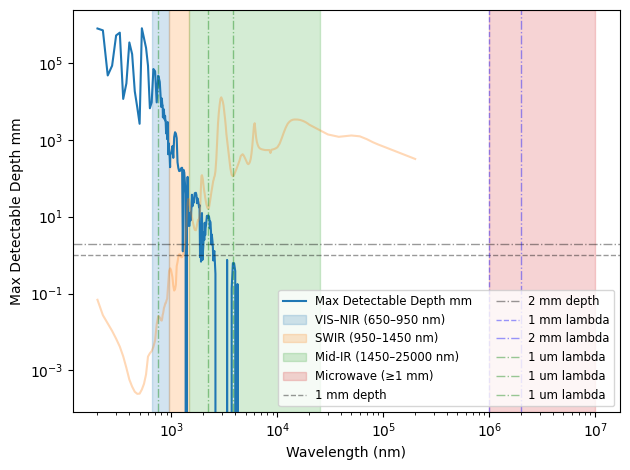

In [ ]:
plot_spectrum(depths) # 3mm

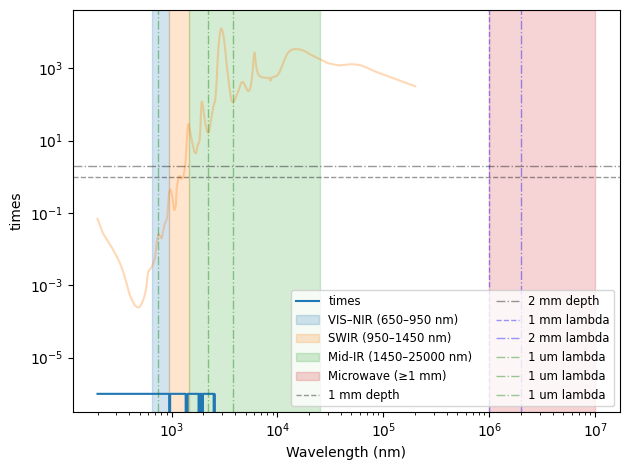

In [241]:
plot_spectrum(exposures, label = 'times')

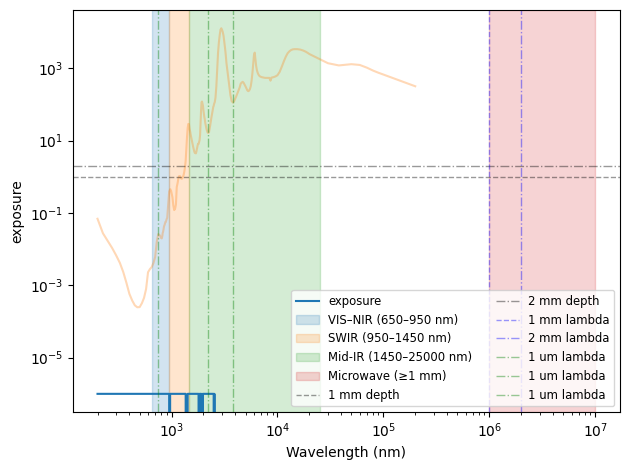

In [239]:
plot_spectrum(exposures, label = 'exposure')

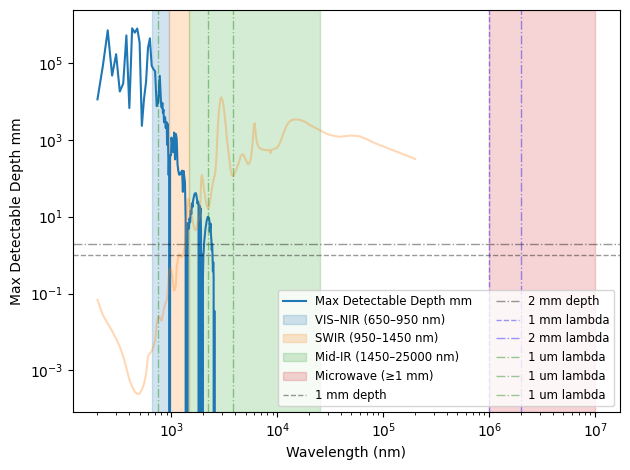

In [238]:
plot_spectrum(depths)

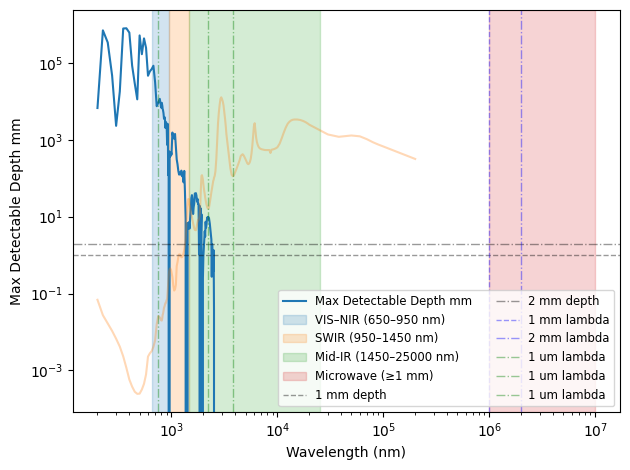

In [235]:
plot_spectrum(depths)

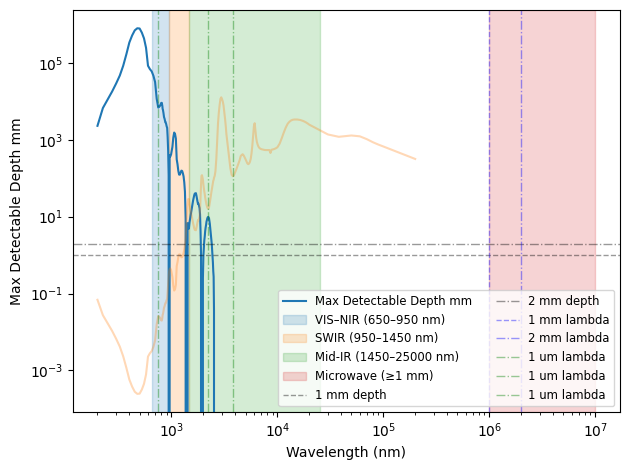

In [229]:
plot_spectrum(depths)

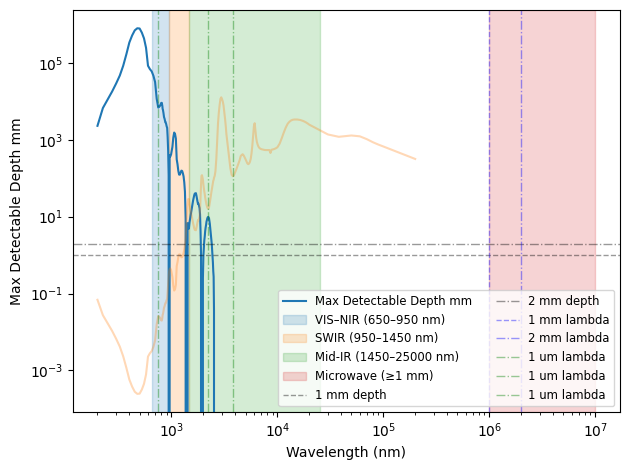

In [223]:
plot_spectrum(depths)

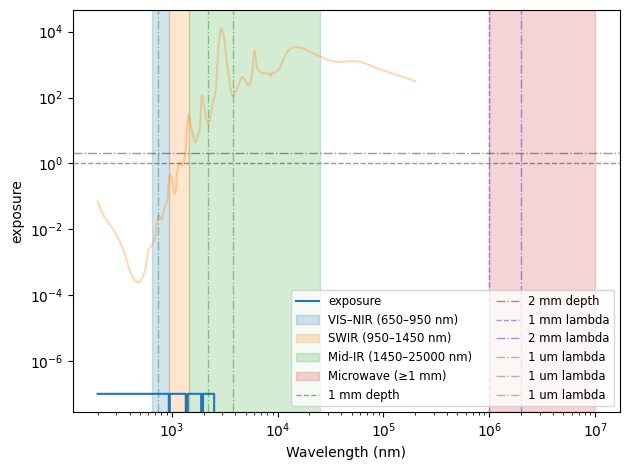

In [224]:
plot_spectrum(exposures, label = 'exposure')

### Introducing scattering

In [46]:
df = pd.read_excel(f'/home/bruno/Desktop/keorkle/Brain Reading/code/data/dielectric_database/Alternative_dielectric_properties_database_V4.2(Excel).xls',
                    header=[1, 2], index_col=1)

In [51]:
diel_df = df['Dielectric Properties']

In [56]:
dl_brain = diel_df.loc['Brain (Grey Matter)']
dl_skull = diel_df.loc['Skull']

In [61]:
dl_brain

Name
ef             12.700000
del1            0.000000
tau1 (ps)      15.915000
alf1            0.000000
del2           32.200000
tau2 (ns)       0.008511
alf2            0.075000
sig             0.173000
del3         1170.000000
tau3 (µs)       0.067439
alf3            0.315000
del4            0.000000
tau4 (ms)      15.915000
alf4            0.000000
Name: Brain (Grey Matter), dtype: float64

In [ ]:
def dielectric_from_row(row, lam_nm):
    """
    Compute complex permittivity ε*(ω), its real part ε′, and
    effective conductivity σ_eff at wavelengths (nm).

    Parameters
    ----------
    row : pandas.Series
        Cole–Cole parameters:
          - 'ef'              : ε∞
          - 'del1'...'del4'   : Δε₁…Δε₄
          - 'tau1 (ps)'...'tau4 (ms)' : τ₁…τ₄ in ps, ns, µs, ms
          - 'alf1'...'alf4'   : α₁…α₄
          - 'sig'             : σ_dc (S/m)
    lam_nm : float or array‑like
        Vacuum wavelength(s) in nanometers.

    Returns
    -------
    eps_star  : complex or ndarray of complex
        Full ε*(ω) = ε′ – j ε″.
    eps_real  : float or ndarray
        Real part ε′(ω).
    sigma_eff : float or ndarray
        Effective conductivity ω ε₀ ε″ (S/m).
    """
    # constants
    c    = 3e8               # m/s
    eps0 = 8.854e-12         # F/m

    # wavelength → ω
    lam_m = np.array(lam_nm, float) * 1e-9
    omega = 2 * np.pi * c / lam_m

    # read DC terms
    eps_inf  = row['ef']
    sigma_dc = row['sig']

    # pack Cole–Cole terms
    delta = np.array([row[f'del{i}'] for i in range(1,5)])
    tau   = np.array([
        row['tau1 (ps)'] * 1e-12,
        row['tau2 (ns)'] * 1e-9,
        row['tau3 (µs)'] * 1e-6,
        row['tau4 (ms)'] * 1e-3,
    ])
    alpha = np.array([row[f'alf{i}'] for i in range(1,5)])

    # build ε*(ω)
    eps_star = eps_inf + np.zeros_like(omega, dtype=complex)
    for Δε, τ, α in zip(delta, tau, alpha):
        eps_star += Δε / (1 + (1j * omega * τ)**(1 - α))

    # add conductive term: σ_dc / (jωε₀)
    eps_star += sigma_dc / (1j * omega * eps0)

    # extract outputs
    eps_real  = np.real(eps_star)
    eps_imag  = np.imag(eps_star)
    sigma_eff = omega * eps0 * eps_imag

    return eps_star, eps_real, sigma_eff

ε' @500nm = 3.07, σ_eff @500nm = -3.004e+02 S/m


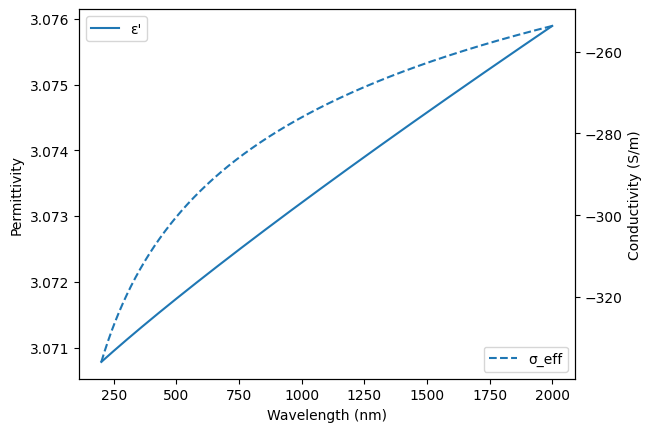

In [59]:
# Single wavelength
_, eps, sig = dielectric_from_row(diel_df.iloc[0], lam_nm=500)
print(f"ε' @500nm = {eps:.2f}, σ_eff @500nm = {sig:.3e} S/m")

# Array of wavelengths
lams = np.linspace(200, 2000, 1000)   # 200–2000 nm
_, eps_vals, sig_vals = dielectric_from_row(diel_df.iloc[0], lam_nm=lams)

# Plotting (example, in Jupyter):
import matplotlib.pyplot as plt
plt.plot(lams, eps_vals, label="ε'")
plt.xlabel("Wavelength (nm)"); plt.ylabel("Permittivity"); plt.legend()
plt.twinx().plot(lams, sig_vals, label="σ_eff", linestyle="--")
plt.ylabel("Conductivity (S/m)"); plt.legend(loc='lower right')
plt.show()

In [74]:
def absorption_coeff(eps_complex, lam_nm):
    """
    Compute absorption coefficient µ_a (m^-1) from complex permittivity.

    Parameters
    ----------
    eps_complex : float or ndarray
        Complex relative permittivity ε*(ω).
    lam_nm : float or ndarray
        Wavelength in nanometers.

    Returns
    -------
    mu_a : float or ndarray
        Absorption coefficient in m^-1.
    """
    # Constants
    eps0 = 8.854e-12      # F/m
    c    = 3e8            # m/s

    # Convert λ → ω
    lam_m = np.array(lam_nm, dtype=float) * 1e-9
    omega = 2 * np.pi * c / lam_m

    # complex refractive index
    n_complex = np.sqrt(eps_complex)
    kappa = -np.imag(n_complex)   # extinction index

    # absorption µ_a = 2 k0 kappa
    k0 = 2 * np.pi / lam_m
    mu_a = 2 * k0 * kappa

    return mu_a

def rayleigh_scattering_coeff(lam_nm, a, N, m):
    """
    Compute Rayleigh scattering coefficient µ_s (m^-1).

    Parameters
    ----------
    lam_nm : float or ndarray
        Wavelength in nanometers.
    a : float
        Scatterer radius in meters.
    N : float
        Number density of scatterers (m^-3).
    m : float or complex
        Relative refractive index n_scat / n_med.

    Returns
    -------
    mu_s : float or ndarray
        Scattering coefficient in m^-1.
    """
    lam_m = np.array(lam_nm, dtype=float) * 1e-9

    # Rayleigh cross-section per sphere
    x = (8 * np.pi**3 * a**6) / (3 * lam_m**4)
    contrast = np.abs((m**2 - 1) / (m**2 + 2))**2

    sigma_sca = x * contrast
    mu_s = N * sigma_sca
    return mu_s

In [88]:
def get_dl_parameters(row, lambdas, just = None):

    results = {}

    for lam_nm in lambdas:

        # 1) complex permittivity from your row of Cole–Cole params
        eps_star, eps_real, sigma_eff = dielectric_from_row(row, lam_nm)   # reuse code from earlier

        # 2) absorption coefficient
        mu_a = absorption_coeff(eps_star, lam_nm)

        # 3) scattering coefficient
        #    e.g. a = 100e-9 m (100 nm), N = 1e15 m^-3, m = 1.05
        mu_s = rayleigh_scattering_coeff(
            lam_nm,       # wavelength array in nm
            a=0.25e-6,    # 0.25 µm radius
            N=3e17,       # m^-3
            m=1.08        # dimensionless
        )

        if just == 'mu_s':
            results[lam_nm] = float(mu_s)
        elif just == 'mu_a':
            results[lam_nm] = float(mu_a)
        else:
            results[lam_nm] = [float(mu_a), float(mu_s)]

    return results

In [142]:
lambdas = [int(v) for v in np.logspace(np.log10(200), np.log10(2e5), 50)[::-1]]

mus_brain = get_dl_parameters(dl_brain, lambdas, just = 'mu_s')
mus_skull = get_dl_parameters(dl_skull, lambdas, just = 'mu_s')

mua_brain = get_dl_parameters(dl_brain, lambdas, just = 'mu_a')
mua_skull = get_dl_parameters(dl_skull, lambdas, just = 'mu_a')

In [143]:
lambdas

[200000,
 173702,
 150862,
 131025,
 113797,
 98834,
 85838,
 74551,
 64749,
 56235,
 48841,
 42419,
 36841,
 31997,
 27789,
 24135,
 20962,
 18205,
 15812,
 13732,
 11927,
 10358,
 8996,
 7813,
 6786,
 5894,
 5119,
 4445,
 3861,
 3353,
 2912,
 2529,
 2197,
 1908,
 1657,
 1439,
 1250,
 1085,
 942,
 818,
 711,
 617,
 536,
 465,
 404,
 351,
 305,
 265,
 230,
 200]

In [107]:
freqs[::1]

array([   200.,    225.,    250.,    275.,    300.,    325.,    350.,
          375.,    400.,    425.,    450.,    475.,    500.,    525.,
          550.,    575.,    600.,    625.,    650.,    675.,    700.,
          725.,    750.,    775.,    800.,    810.,    820.,    825.,
          830.,    840.,    850.,    860.,    870.,    875.,    880.,
          890.,    900.,    910.,    920.,    925.,    930.,    940.,
          950.,    960.,    970.,    975.,    980.,    990.,   1000.,
         1020.,   1040.,   1060.,   1080.,   1100.,   1120.,   1140.,
         1160.,   1180.,   1200.,   1220.,   1240.,   1260.,   1280.,
         1300.,   1320.,   1340.,   1360.,   1380.,   1400.,   1420.,
         1440.,   1460.,   1480.,   1500.,   1520.,   1540.,   1560.,
         1580.,   1600.,   1620.,   1640.,   1660.,   1680.,   1700.,
         1720.,   1740.,   1760.,   1780.,   1800.,   1820.,   1840.,
         1860.,   1880.,   1900.,   1920.,   1940.,   1960.,   1980.,
         2000.,   20

In [139]:
vals[-1]

np.float64(317.0)

In [141]:
mua_brain

{200000: 5808.200124699193,
 210579: 5771.471150366424,
 221718: 5734.939909899072,
 233446: 5698.596910904249,
 245795: 5662.427739279615,
 258797: 5626.422499411141,
 272486: 5590.569625098623,
 286900: 5554.851494936113,
 302076: 5519.257463254048,
 318055: 5483.7713319829345,
 334879: 5448.378886307144,
 352594: 5413.061587332783,
 371245: 5377.806853161562,
 390883: 5342.594329895261,
 411559: 5307.407676974166,
 433330: 5272.224102648528,
 456251: 5237.02782245989,
 480386: 5201.7926502048895,
 505797: 5166.499230662568,
 532552: 5131.123043613909,
 560722: 5095.639121357182,
 590383: 5060.019669459825,
 621613: 5024.237908779524,
 654494: 4988.265558294643,
 689115: 4952.069908927916,
 725567: 4915.61947744501,
 763948: 4878.878896759288,
 804358: 4841.814018439595,
 846906: 4804.3854643166205,
 891705: 4766.553618235499,
 938874: 4728.276936334025,
 988538: 4689.512175495683,
 1040829: 4650.213859238155,
 1095885: 4610.335312092553,
 1153854: 4569.826086584413,
 1214890: 4528.6

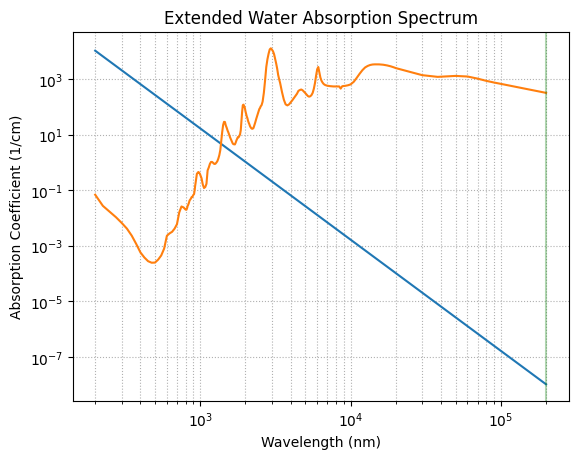

In [146]:
mua_brain_ = list(mus_brain.values())




plt.loglog(lambdas,mua_brain_)
plt.loglog(freqs, vals)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.axvline(200000, color='g', alpha = 0.3)
plt.title('Extended Water Absorption Spectrum')
plt.grid(True, which='both', linestyle=':')
plt.show()


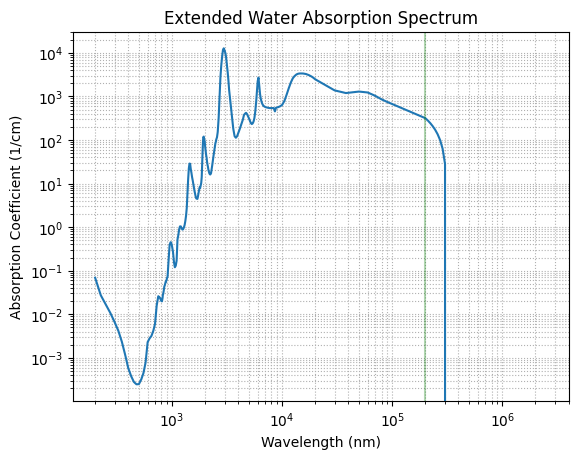

In [136]:
mua_brain_ = list(mua_brain.values())

ext_freqs = list(freqs) + lambdas[1:]
# ext_vals = list(vals) + mua_brain_[1:]

diff = int(mua_brain_[0]-list(vals)[-1])
ext_vals = list(vals) + [ m - diff for m in mua_brain_[1:]]

plt.loglog(ext_freqs,ext_vals)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.axvline(200000, color='g', alpha = 0.3)
plt.title('Extended Water Absorption Spectrum')
plt.grid(True, which='both', linestyle=':')
plt.show()


### Second try

In [149]:
def dielectric_from_row(row, lam_nm):
    """
    Compute complex permittivity ε*(ω), its real part ε′,
    effective conductivity σ_eff, and absorption coefficient μ_a
    at wavelengths given in nanometers.

    Parameters
    ----------
    row : pandas.Series
        Cole–Cole parameters:
          - 'ef'              : ε∞ (infinite‑freq permittivity)
          - 'del1'...'del4'   : Δε₁…Δε₄ (dielectric strengths)
          - 'tau1 (ps)'...'tau4 (ms)'
                             : τ₁…τ₄ relaxation times (ps, ns, µs, ms)
          - 'alf1'...'alf4'   : α₁…α₄ broadening exponents
          - 'sig'             : σ_dc (S/m)
    lam_nm : float or array‑like
        Vacuum wavelength(s) in **nanometers**.

    Returns
    -------
    eps_star  : complex or ndarray of complex
        Full complex permittivity ε*(ω) = ε′ – j ε″.
    eps_real  : float or ndarray
        Real part ε′(ω).
    sigma_eff : float or ndarray
        Effective conductivity σ_eff(ω) = ω ε₀ ε″ (S/m).
    mu_a      : float or ndarray
        Absorption coefficient μₐ(ω) (m⁻¹), computed as 2 k₀ κ where
        κ = –Im{sqrt(ε*(ω))} and k₀ = 2π/λ.
    """
    # Physical constants
    c    = 3e8               # Speed of light, m/s
    eps0 = 8.854e-12         # Vacuum permittivity, F/m

    # Convert wavelength (nm) → meters, then to angular frequency ω
    lam_m = np.array(lam_nm, dtype=float) * 1e-9
    omega = 2 * np.pi * c / lam_m

    # Unpack Cole–Cole parameters
    eps_inf  = row['ef']
    sigma_dc = row['sig']
    delta    = np.array([row[f'del{i}'] for i in range(1,5)])
    tau      = np.array([
        row['tau1 (ps)'] * 1e-12,
        row['tau2 (ns)'] * 1e-9,
        row['tau3 (µs)'] * 1e-6,
        row['tau4 (ms)'] * 1e-3,
    ])
    alpha    = np.array([row[f'alf{i}'] for i in range(1,5)])

    # Build the complex permittivity ε*(ω)
    eps_star = eps_inf + np.zeros_like(omega, dtype=complex)
    for Δε, τ, α in zip(delta, tau, alpha):
        eps_star += Δε / (1 + (1j * omega * τ)**(1 - α))
    # Add DC conductivity term
    eps_star += sigma_dc / (1j * omega * eps0)

    # Extract the real part and compute σ_eff
    eps_real  = np.real(eps_star)
    eps_imag  = np.imag(eps_star)
    sigma_eff = omega * eps0 * eps_imag

    # --- New: compute absorption coefficient μ_a ---
    # 1) Complex refractive index n* = sqrt(ε*)
    n_star = np.sqrt(eps_star)
    # 2) Extinction coefficient κ = –Im{n*}
    kappa  = -np.imag(n_star)
    # 3) Free‑space wavenumber k0 = 2π/λ
    k0      = 2 * np.pi / lam_m
    # 4) Absorption μ_a = 2 k0 κ
    mu_a    = 2 * k0 * kappa

    return eps_star, eps_real, sigma_eff, mu_a

In [150]:
def get_dl_parameters(row, lambdas, just = None):

    results = {}

    for lam_nm in lambdas:

        # 1) complex permittivity from your row of Cole–Cole params
        eps_star, eps_real, sigma_eff, mu_a = dielectric_from_row(row, lam_nm)   # reuse code from earlier



        # 3) scattering coefficient
        #    e.g. a = 100e-9 m (100 nm), N = 1e15 m^-3, m = 1.05
        mu_s = rayleigh_scattering_coeff(
            lam_nm,       # wavelength array in nm
            a=0.25e-6,    # 0.25 µm radius
            N=3e17,       # m^-3
            m=1.08        # dimensionless
        )

        if just == 'mu_s':
            results[lam_nm] = float(mu_s)
        elif just == 'mu_a':
            results[lam_nm] = float(mu_a)
        else:
            results[lam_nm] = [float(mu_a), float(mu_s)]

    return results

In [151]:
lambdas = [int(v) for v in np.logspace(np.log10(200), np.log10(2e5), 50)[::-1]]

mus_brain = get_dl_parameters(dl_brain, lambdas, just = 'mu_s')
mus_skull = get_dl_parameters(dl_skull, lambdas, just = 'mu_s')

mua_brain = get_dl_parameters(dl_brain, lambdas, just = 'mu_a')
mua_skull = get_dl_parameters(dl_skull, lambdas, just = 'mu_a')

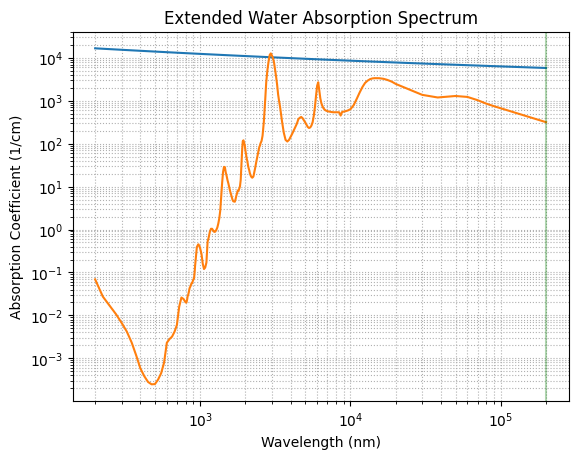

In [156]:
mua_brain_ = list(mua_brain.values())

plt.loglog(lambdas,mua_brain_)
plt.loglog(freqs, vals)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (1/cm)')
plt.axvline(200000, color='g', alpha = 0.3)
plt.title('Extended Water Absorption Spectrum')
plt.grid(True, which='both', linestyle=':')
plt.show()


### Coefficient estrapolation attempt 2

In [78]:
freqs = water_data['lambda'].to_numpy()
vals = water_data['mu_a'].to_numpy()

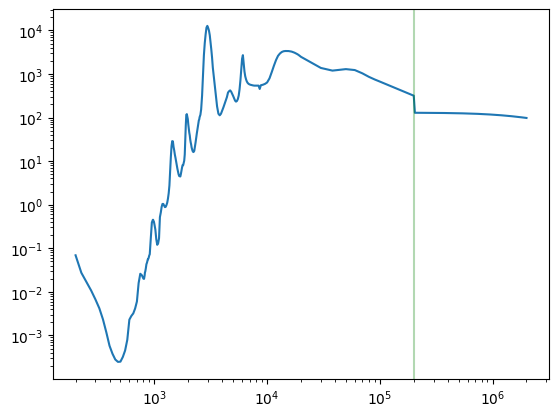

In [20]:


# Debye model parameters for water at 25 °C (from sensors paper):
eps_s = 78.36      # static permittivity
eps_inf = 5.2      # infinite-frequency permittivity
tau = 8.27e-12     # relaxation time in seconds

# Speed of light
c = 299792458  # m/s

# Generate 100 log-spaced wavelengths between 200,000 nm and 2,000,000 nm
wavelengths_nm = np.logspace(np.log10(200000), np.log10(2000000), num=100)
wavelengths_m = wavelengths_nm * 1e-9  # convert nm to meters

# Angular frequency
omega = 2 * np.pi * c / wavelengths_m

# Complex permittivity (single Debye)
epsilon = eps_inf + (eps_s - eps_inf) / (1 + 1j * omega * tau)

# Complex refractive index
n_complex = np.sqrt(epsilon)

# Ensure positive imaginary part for extinction coefficient
n_complex = np.where(n_complex.imag >= 0, n_complex, -n_complex)
k = n_complex.imag

# Compute absorption coefficient alpha in cm^-1
lambda_cm = wavelengths_m * 100  # m to cm
alpha = 4 * np.pi * k / lambda_cm

# Create DataFrame
df = pd.DataFrame({
    "wavelength_nm": wavelengths_nm,
    "absorption_coefficient_cm^-1": alpha
})

ext_freqs = list(freqs) + list(df["wavelength_nm"].to_numpy())[1:]
ext_vals = list(vals) + list(df["absorption_coefficient_cm^-1"].to_numpy())[1:]


plt.loglog(ext_freqs,ext_vals)
plt.axvline(200000, color = 'green', alpha = 0.3)

plt.show()

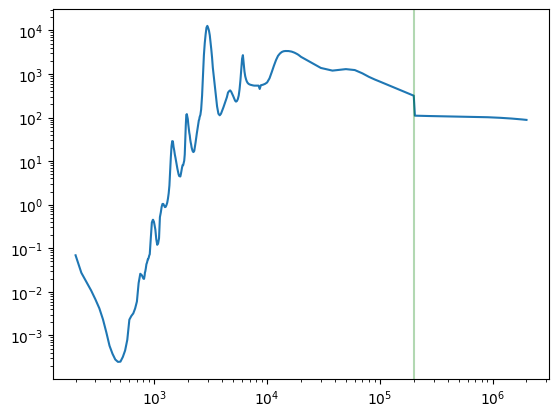

In [ ]:


# Empirical hyperparameters at 25 °C from Ellison (2007):
# Debye relaxation (single):
delta_eps = 72.38              # Δε from Table 1 at 25°C
tau = 8.28e-12                 # τ = 8.28 ps

# High-frequency permittivity (ε_inf = ε_s - Δε):
eps_s = 87.9144 - 0.404399*25 + 9.58726e-4*25**2 - 1.32802e-6*25**3  # static permittivity from Ellison's polynomial
eps_inf = eps_s - delta_eps

# Lorentz oscillators (2) at 25 °C from Ellison's parameters:
# Oscillator 1:
delta_eps1 = 0.67691935        # Δε4 from p0-p2 at t=25°C
f01 = 4.0505138e12             # f0 from p3-p6 at t=25°C (Hz)
omega01 = 2 * np.pi * f01
gamma1 = 0.1 * omega01         # damping ≈10% of resonance freq (rad/s)

# Oscillator 2:
# Δε5 from p11-p13
delta_eps2 = 0.7379317        # computed from Ellison's Table 2 at t=25°C
f02 = 14.693e12               # f1 ≈ 14.693 THz
omega02 = 2 * np.pi * f02
gamma2 = 0.1 * omega02         # damping ≈ 10%

# Speed of light
c = 299792458  # m/s

# Wavelength range
wavelengths_nm = np.logspace(np.log10(200000), np.log10(2000000), num=100)
wavelengths_m = wavelengths_nm * 1e-9  # nm to m
omega = 2 * np.pi * c / wavelengths_m  # angular frequency (rad/s)

# Complex permittivity
epsilon = eps_inf + delta_eps / (1 + 1j * omega * tau)
epsilon += delta_eps1 * omega01**2 / (omega01**2 - omega**2 + 1j * omega * gamma1)
epsilon += delta_eps2 * omega02**2 / (omega02**2 - omega**2 + 1j * omega * gamma2)

# Complex refractive index
n_complex = np.sqrt(epsilon)
k = np.abs(n_complex.imag)  # extinction coefficient

# Absorption coefficient alpha (cm^-1)
lambda_cm = wavelengths_m * 100  # convert m to cm
alpha = 4 * np.pi * k / lambda_cm

# Create and show DataFrame
df = pd.DataFrame({
    "wavelength_nm": wavelengths_nm,
    "absorption_coefficient_cm^-1": alpha
})

ext_freqs = list(freqs) + list(df["wavelength_nm"].to_numpy())[1:]
ext_vals = list(vals) + list(df["absorption_coefficient_cm^-1"].to_numpy())[1:]


plt.loglog(ext_freqs,ext_vals)
plt.axvline(200000, color = 'green', alpha = 0.3)

plt.show()

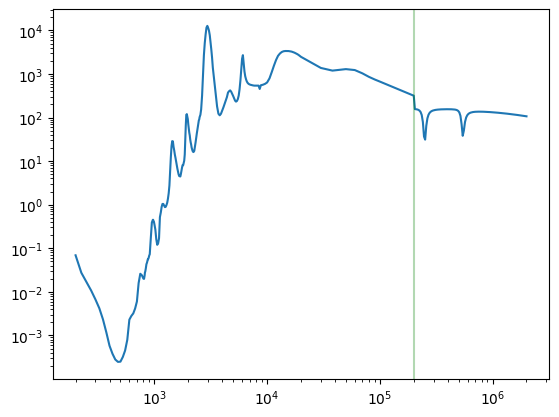

In [22]:
# Wavelength range
wavelengths_nm = np.logspace(np.log10(200000), np.log10(2000000), num=100)
wavelengths_m = wavelengths_nm * 1e-9  # nm to m
omega = 2 * np.pi * 299792458 / wavelengths_m  # angular frequency (rad/s)

# Debye relaxation (single)
eps_s = 78.36     # static permittivity
eps_inf = 3.3     # high-frequency permittivity
tau = 8.27e-12    # relaxation time (s)

# Lorentz oscillators (3)
# Parameters: strength factors f_j, resonance freq (rad/s), damping Gamma_j (rad/s)
osc_params = [
    {"f": 0.20, "omega0": 2*np.pi*0.55e12, "gamma": 0.1*(2*np.pi*0.55e12)},
    {"f": 0.10, "omega0": 2*np.pi*1.20e12, "gamma": 0.1*(2*np.pi*1.20e12)},
    {"f": 0.05, "omega0": 2*np.pi*2.00e12, "gamma": 0.1*(2*np.pi*2.00e12)}
]

# Build complex permittivity
epsilon = eps_inf + (eps_s - eps_inf) / (1 + 1j * omega * tau)
for osc in osc_params:
    s_j = osc["f"] * osc["omega0"]**2
    epsilon += s_j / (osc["omega0"]**2 - omega**2 - 1j * osc["gamma"] * omega)

# Complex refractive index
n_complex = np.sqrt(epsilon)
k = np.abs(n_complex.imag)  # ensure positive

# Absorption coefficient alpha (cm^-1)
lambda_cm = wavelengths_m * 100
alpha = 4 * np.pi * k / lambda_cm

# Create and show DataFrame
df = pd.DataFrame({
    "wavelength_nm": wavelengths_nm,
    "absorption_coefficient_cm^-1": alpha
})
ext_freqs = list(freqs) + list(df["wavelength_nm"].to_numpy())[1:]
ext_vals = list(vals) + list(df["absorption_coefficient_cm^-1"].to_numpy())[1:]


plt.loglog(ext_freqs,ext_vals)
plt.axvline(200000, color = 'green', alpha = 0.3)

plt.show()

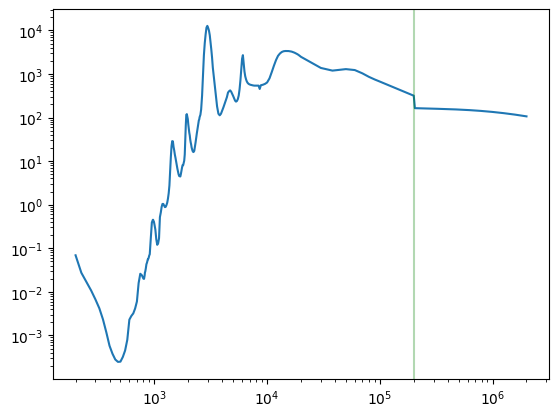

In [79]:
# Temperature for which to adjust parameters
T = 37  # °C

# Polynomial coefficients for static permittivity ε_s(T) from Ellison (2007)
# ε_s(T) = a + b*T + c*T^2 + d*T^3
a, b, c, d = 87.9144, -0.404399, 9.58726e-4, -1.32802e-6
eps_s = a + b*T + c*T**2 + d*T**3

# Ellison (2007) parameters at 25°C
delta_eps = 72.38   # Δε for Debye
tau = 8.28e-12      # relaxation time (s)
# Lorentz oscillator parameters (from Ellison Table 2 at 25°C)
delta_eps1, f01 = 0.67691935, 4.0505138e12  # oscillator 1
delta_eps2, f02 = 0.7379317, 14.693e12      # oscillator 2
omega01 = 2 * np.pi * f01
omega02 = 2 * np.pi * f02
gamma1 = 0.1 * omega01
gamma2 = 0.1 * omega02

eps_inf = eps_s - delta_eps

# Wavelength range
wavelengths_nm = np.logspace(np.log10(200000), np.log10(2000000), num=100)
wavelengths_m = wavelengths_nm * 1e-9
omega = 2 * np.pi * 299_792_458 / wavelengths_m

# Build complex permittivity ε*(ω)
epsilon = eps_inf + delta_eps / (1 + 1j * omega * tau)
epsilon += delta_eps1 * omega01**2 / (omega01**2 - omega**2 + 1j * omega * gamma1)
epsilon += delta_eps2 * omega02**2 / (omega02**2 - omega**2 + 1j * omega * gamma2)

# Complex refractive index and extinction coefficient k(ω)
n_complex = np.sqrt(epsilon)
k = np.abs(n_complex.imag)

# Absorption coefficient α (cm^-1)
lambda_cm = wavelengths_m * 100
alpha = 4 * np.pi * k / lambda_cm

# Create DataFrame
df = pd.DataFrame({
    "wavelength_nm": wavelengths_nm,
    "absorption_coefficient_cm^-1": alpha
})

ext_freqs = list(freqs) + list(df["wavelength_nm"].to_numpy())[1:]
ext_vals = list(vals) + list(df["absorption_coefficient_cm^-1"].to_numpy())[1:]


plt.loglog(ext_freqs,ext_vals)
plt.axvline(200000, color = 'green', alpha = 0.3)

plt.show()

In [109]:
water_skull_data

,lambda,mu_a_water,mu_a_skull
0,2.000000e+02,0.069000,6.900000
1,2.250000e+02,0.027400,2.740000
2,2.500000e+02,0.016800,1.680000
3,2.750000e+02,0.010700,1.070000
4,3.000000e+02,0.006700,0.670000
...,...,...,...
325,1.822326e+06,110.709126,33.212738
326,1.865207e+06,109.728960,32.918688
327,1.909097e+06,108.742021,32.622606
328,1.954020e+06,107.748686,32.324606


### Sanity Check with flat values

In [110]:
len(water_skull_data['mu_a_water'])

330

In [115]:
dummy_water = water_skull_data

dummy_water['mu_a_water'] = pd.DataFrame(np.ones(330)*30)
dummy_water['mu_a_skull'] = pd.DataFrame(np.ones(330)*20)

In [116]:
dummy_water

,lambda,mu_a_water,mu_a_skull
0,2.000000e+02,30.0,20.0
1,2.250000e+02,30.0,20.0
2,2.500000e+02,30.0,20.0
3,2.750000e+02,30.0,20.0
4,3.000000e+02,30.0,20.0
...,...,...,...
325,1.822326e+06,30.0,20.0
326,1.865207e+06,30.0,20.0
327,1.909097e+06,30.0,20.0
328,1.954020e+06,30.0,20.0


Detected 16 logical CPUs


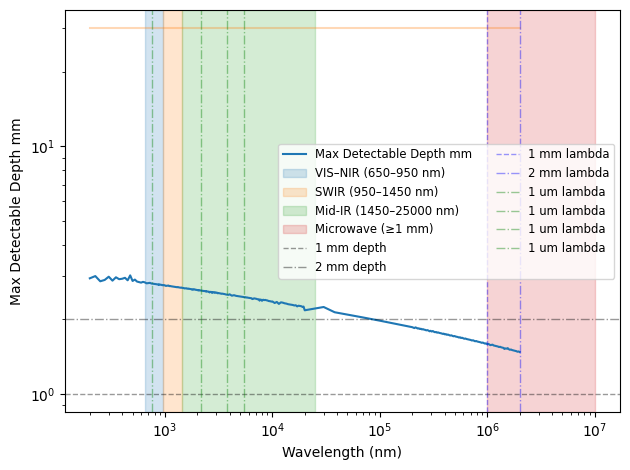

In [117]:
# 

# 1. Figure out how many logical CPUs (hardware threads) you have:
max_workers = os.cpu_count()   # e.g. 16 on a 8‑core/16‑thread machine
print(f"Detected {max_workers} logical CPUs")
amplitude_grid = np.logspace(18, 25, 8)
pulse_freq_grid = np.logspace(3, 9, 8)
pulse_duration_grid= np.logspace(-14, -9, 8)
# 2. Build the list of argument‑dicts you want to map:
tasks = []
for wavelength, mu_water, mu_skull in dummy_water.values:
    tasks.append({
        'wavelength': wavelength,
        'amplitude_grid': amplitude_grid,
        'mu_a_brain': mu_water * 100,
        'pulse_freq_grid': pulse_freq_grid,
        'pulse_duration_grid': pulse_duration_grid,
        'skull': True,
        'mu_a_skull': mu_skull * 100,
        'skull_thickness_mm': 5.5,
        'NEP': 1e-14,
        'arrhenius_threshold': arrhenius_threshold,
        'arrhenius_threshold_pulse': arrhenius_threshold_pulse,
        'max_stimulation_per_trial': max_stimulation_per_trial,
        'tau_brain': tau_brain,
        'verbose': False,
        'num_loops': len(water_skull_data['lambda'])
    })

# 3. Spawn a pool of worker processes:
with ProcessPoolExecutor(max_workers=14) as executor:
    futures = [executor.submit(optimize_pulse_schedule, **kw) for kw in tasks]

    results = []
    for future in as_completed(futures):
        try:
            results.append(future.result())
        except Exception as e:
            print("Worker raised:", e)


depths = [result['max_depth_mm'] for result in results]

exposures = [result['max_exposure_time'] for result in results]

times = [result['max_time'] for result in results]

plot_spectrum(depths)

### Jaques scattering data

In [119]:
table1 = pd.read_csv(r'/home/bruno/Desktop/keorkle/Brain Reading/code/data/table1_Jacques.csv')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 6, saw 3


In [202]:
import scipy.io
mat = scipy.io.loadmat(r'/home/bruno/Desktop/keorkle/Brain Reading/code/data/table1_Jacques.mat')

In [203]:
data_keys = [k for k in mat.keys() if not k.startswith('__')]
print("Your data variables:", data_keys)

Your data variables: ['tissue', 'legend', 'readme']


In [204]:
mat['tissue'][0].dtype.names

('nm', 'musp', 'name', 'ref', 'type', 'abafm')

In [205]:
mat['readme']

array(['Table 1: Parameters specifying the reduced scattering coefficient of tissues.',
       'The data are listed as an array structure                                    ',
       '   tissue(k) for k=1:56 citations, with fields:                              ',
       '   tissue(k).nm    = wavelengths [nm]                                        ',
       '   tissue(k).musp  = reduced scattering coeff. [cm^-1]                       ',
       '   tissue(k).name  = tissue description                                      ',
       '   tissue(k).ref   = reference cited                                         ',
       '   tissue(k).type  = tissue type                                             ',
       '   tissue(k).abafm = [a b aa fray bmie]                                      ',
       'Citation: SL Jacques, Optical properties of biological tissues: a review,    ',
       'Phys. Med. Biol. 58 (2013) R37?R61, doi:10.1088/0031-9155/58/11/R37          '],
      dtype='<U77')

In [206]:
tissue_data = mat['tissue'][0]

In [207]:
import numpy as np

def unwrap_record(rec):
    # 1) wavelengths & coeffs → 1‑D float arrays
    nm   = rec['nm'].flatten()      # shape (23,)
    musp = rec['musp'].flatten()    # shape (23,)

    # 2) name/ref/type → simple Python strings
    name     = str(rec['name'][0])
    reference= str(rec['ref'][0])
    ttype    = str(rec['type'][0])

    # 3) abafm → 1‑D float array of length 5
    aba = rec['abafm'].flatten()    # [a, b, aa, fray, bmie]

    return {
        'nm':    nm,
        'musp':  musp,
        'name':  name,
        'ref':   reference,
        'type':  ttype,
        'abafm': aba
    }

# Build a list of 56 dicts:
tissues = [unwrap_record(rec) for rec in tissue_data]

# Inspect the first:
print(tissues[0])
# {
#   'nm': array([307, 357, …, 857]),
#   'musp': array([17.2, 16.8, …,  8.0]),
#   'name': 'skin',
#   'ref': '…',
#   'type': 'soft tissue',
#   'abafm': array([0.5, 1.1, 2.3,  …, 0.05])
# }

{'nm': array([ 307,  357,  407,  457,  507,  557,  607,  657,  707,  757,  856,
        906,  956, 1006, 1056, 1106, 1156, 1206, 1256, 1306, 1356, 1406,
       1456], dtype=uint16), 'musp': array([125.09676347, 100.26849582,  72.13570332,  52.89699242,
        42.81589846,  36.61724147,  31.27950681,  28.6209786 ,
        25.9784633 ,  23.09722838,  19.52847536,  17.66549142,
        17.02767758,  16.40540724,  15.77158633,  15.62456896,
        15.00839588,  14.3581873 ,  14.45331154,  13.32679592,
        11.90748586,   8.32219316,   8.03620117]), 'name': 'skin', 'ref': 'Anderson 1980', 'type': 'skin', 'abafm': array([48.94096511,  1.5480294 , 45.60779447,  0.2155676 ,  1.18435904])}


In [215]:
for t in tissues:
    print(t['name'], t['type'],'    ', len(t['nm']),'    ', min(t['nm']), max(t['nm']))
    print(max(t['nm']) - min(t['nm']))
    print(np.mean(t['musp']), np.std(t['musp']))
    print(t['ref'])
    print(' ')

    if t['name'] == 'cortex (temporal lobe)':
        brain_mu_s = t
        print('SAVED')
    if t['name'] == 'skull' and int(np.mean(t['musp'])) == 19:
        skull_mu_s = t
        print('SAVED')

skin skin      23      307 1456
1149
31.575784772813932 29.334503961319427
Anderson 1980
 
skin skin      49      340.849334073252 1073.8068812430633
732.9575471698113
41.028640255885406 44.153686661880485
Jacques 1996
 
skin skin      9      617.9500119999999 973.349976
355.39996400000007
20.218503254337733 4.2299032297472365
Simpson  et al 1998
 
skin skin      9      400 800
400
49.48042821514511 20.605914736393615
Saidi  et al 1995
 
skin skin      21      500 1500
1000
19.487047755543504 5.489258740710282
Bashkatov et al 2005
 
dermis skin      30      367.05202312138726 1272.2543352601156
905.2023121387283
29.58323832413305 17.98437675456607
Salomatina et al 2006
 
epidermis skin      35      363.47826086956525 1274.782608695652
911.3043478260868
45.836921287982086 23.499847511908065
Salomatina et al 2006
 
skin skin      31      400 1000
600
22.973837402304483 7.061105259056778
Alexandrakis  et al 2005
 
brain brain      5      420 780
360
28.752 18.995409340153742
Sandell and Z

In [210]:
brain_mu_s

{'nm': array([674, 811, 849, 956], dtype=uint16),
 'musp': array([10. ,  8.2,  8.2,  8.2]),
 'name': 'cortex (temporal lobe)',
 'ref': 'Bevelacqua  et al 1999',
 'type': 'brain',
 'abafm': array([1.15650417e+01, 6.00525714e-01, 1.56819292e+01, 5.34518089e-01,
        1.06233014e-08])}

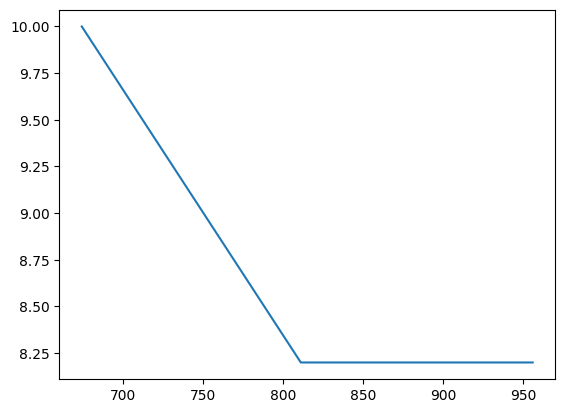

In [213]:
plt.plot(brain_mu_s['nm'], brain_mu_s['musp'])

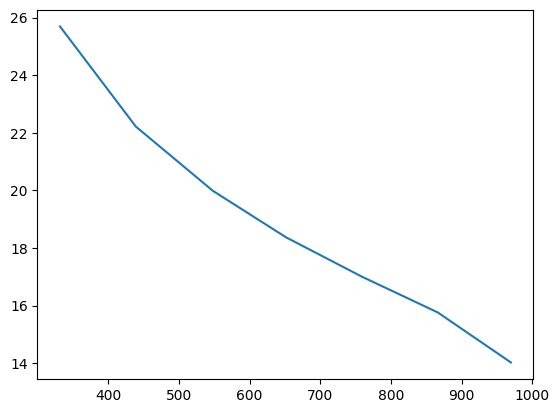

In [214]:
plt.plot(skull_mu_s['nm'], skull_mu_s['musp'])

In [ ]:
from scipy.interpolate import interp1d

f = interp1d(brain_mu_s['nm'],
             old_musp,
             kind='cubic',         # or 'linear', 'nearest', etc.
             fill_value='extrapolate')
new_musp = f(new_nm)

### Adding scattering and resolution to the algorithm

In [21]:
def plot_spectrum(y, label = 'Max Detectable Depth mm', log = True):
    # your existing plot

    if log:
        plt.loglog(water_skull_data['lambda'], y, label=label)
        plt.loglog(water_skull_data['lambda'], water_skull_data['mu_a_water'], alpha=0.3)
    else:
        plt.plot(water_skull_data['lambda'], y, label=label)
        plt.plot(water_skull_data['lambda'], water_skull_data['mu_a_water'], alpha=0.3)



    

    # define band limits (all λ in nm)
    bands = {
        'VIS–NIR (650–950 nm)':   (650,   950,   'C0'),
        'SWIR (950–1450 nm)':     (950,  1450,   'C1'),
        'Mid-IR (1450–25000 nm)': (1450,25000,   'C2'),
        'Microwave (≥1 mm)':      (1e6,  1e7, 'C3'),
    }

    for name, (λ0, λ1, color) in bands.items():
        plt.axvspan(λ0, λ1, color=color, alpha=0.2, label=name)

    # horizontal lines at 1 mm and 2 mm
    plt.axhline(1.0, color='k', linestyle='--', linewidth=1, label='1 mm depth', alpha=0.4)
    plt.axhline(2.0, color='k', linestyle='-.', linewidth=1, label='2 mm depth', alpha=0.4)

    plt.axvline(1000000, color='b', linestyle='--', linewidth=1, label='1 mm lambda', alpha=0.4)
    plt.axvline(2000000, color='b', linestyle='-.', linewidth=1, label='2 mm lambda', alpha=0.4)

    plt.axvline(5500, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(3800, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(2188, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.axvline(750, color='g', linestyle='-.', linewidth=1, label='1 um lambda', alpha=0.4)

    plt.xlabel('Wavelength (nm)')
    plt.ylabel(label)
    plt.legend(loc='best', fontsize='small', ncol=2)
    plt.tight_layout()
    plt.show()

In [22]:
import sys

def get_resolution(I0_avg, t_run, threshold_signal, pulse_snr_boost, mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,  skull_depth_mm, depth_mm = 0.4, NEP = 1e-14):


    

    d_skull = skull_depth_mm * 1e-3
    depth   = depth_mm   * 1e-3

    # ── 1) Diffusion coefficient D = 1/[3(μₐ + μₛ′)] ───────────────────────────
    D_skull = 1.0 / (3.0 * (mu_a_skull   + mu_s_skull_p))
    D_brain = 1.0 / (3.0 * (mu_a_brain   + mu_s_brain_p))


    # ── 2) Photon time-of-flight to each layer, one‐way ──────────────────────────
    t_skull = (1.555 * d_skull) / c
    t_brain = (1.37 * depth  ) / c

    # ── 3) One-way PSF variance contributions ──────────────────────────────────
    sigma2_skull = 2.0 * D_skull * t_skull
    sigma2_brain = 2.0 * D_brain * t_brain

    # combined one-way RMS width (m)
    sigma_oneway = np.sqrt(sigma2_skull + sigma2_brain)

    # two-way adds another pass through both layers
    sigma_total = np.sqrt(2.0) * sigma_oneway

    # infinite-SNR resolution (FWHM in m)
    FWHM_inf = 2.35 * sigma_total

    # ── 4) Center-spot signal and total SNR ─────────────────────────────────────
    # Total energy delivered per area
    E_incident = I0_avg * t_run


    # Convert skull μₐ to per-m if it isn’t already:
    mu_a_skull_m   = mu_a_skull * 1e2       # cm⁻¹ → m⁻¹
    d_skull        = skull_depth_mm * 1e-2  # cm → m

    # two-way transmission through skull:
    F_skull = np.exp(-2.0 * mu_a_skull_m * d_skull)

    # Energy returning at zero lateral offset
    E_center = E_incident * F_skull * np.exp(-2.0 * mu_a_brain * depth)

    # Total SNR including pulse averaging
    # (E_center/threshold_sig) is SNR for a single detection window
    SNR_total = (E_center / threshold_signal) * pulse_snr_boost

    #print('SNR total: ', SNR_total)

    # ── 5) Noise-limited resolution ─────────────────────────────────────────────
    # Solve exp(-r²/(2σ²)) = 1/SNR  ⇒  r_lim = σ √[2 ln(SNR)]
    if SNR_total <= 1.0:
        # no detectable spot — resolution is infinite
        FWHM_noise = np.inf
    else:
        # compute the true noise-limited radius
        r_lim      = sigma_total * np.sqrt(2.0 * np.log(SNR_total))
        FWHM_noise = 2.0 * r_lim



    return FWHM_noise*1e3


In [68]:
def get_thermal_coefficient(
    mu_a: float,
    rho: float = 1040,
    c_p: float = 3650
) -> float:
    """
    Compute thermal coefficient for brain tissue that converts irradiance to
    heating rate (dT/dt) per unit irradiance [K per (W/m²·s)].

    Parameters
    ----------
    mu_a : float
        Absorption coefficient at the wavelength of interest [m⁻¹].
    rho : float
        Tissue density [kg/m³]. Default ~1040 for brain.
    c_p : float
        Specific heat capacity [J/(kg·K)]. Default ~3650 for brain.

    Returns
    -------
    thermal_coeff : float
        Heating rate per irradiance [K/(W/m²·s)].
    """
    # dT/dt = mu_a * I / (rho * c_p)  => thermal_coeff = mu_a/(rho*c_p)
    return mu_a / (rho * c_p)



def max_detectable_depth(
    I0: float,
    exposure_time: float,
    mu_a_brain: float,
    mu_s_prime_brain: float,
    skull: bool = False,
    mu_a_skull: float = None,
    mu_s_prime_skull: float = None,
    skull_thickness_mm: float = 6,
    NEP: float = 1e-14,
    pulse_snr_boost: float = None,
    threshold_signal: float = None
) -> dict:
    """
    Estimate the maximum one-way brain depth at which a returned optical signal
    remains above the detection threshold of a modern photodetector.

    Parameters
    ----------
    I0 : float
        Incident irradiance (power per area) on tissue [W/m²].
    exposure_time : float
        Total exposure/integration time [s].
    mu_a_brain : float
        Brain absorption coefficient at the wavelength of interest [m⁻¹].
    skull : bool, optional
        Whether to include skull attenuation (default: False).
    mu_a_skull : float, optional
        Skull absorption coefficient [m⁻¹] (required if skull=True).
    skull_thickness_mm : float, optional
        Skull thickness [mm] (required if skull=True).
    NEP : float, optional
        Noise Equivalent Power of detector [W/√Hz] (default 1e-12 W/√Hz citeturn0search4).
    threshold_signal : float, optional
        Absolute minimum detectable signal energy per unit area [J/m²].
        If None, computed from NEP and exposure_time:
            noise_bandwidth ≈ 1 / exposure_time  [Hz]
            threshold_power = NEP * √noise_bandwidth  [W/m²]
            threshold_signal = threshold_power * exposure_time  [J/m²]

    Returns
    -------
    dict
        - max_depth_mm: maximum detectable one-way depth [mm]
        - threshold_signal_J_m2: signal-energy threshold used [J/m²]
        - F_skull: round-trip skull transmission factor (if skull=True)
        - status: "OK" or reason why no detection possible
    """
    # Compute or validate threshold_signal [J/m²]
    if threshold_signal is None:
        # Approximate noise-equivalent minimum detectable power [W/m²]
        noise_bandwidth = 1.0 / exposure_time
        threshold_power = NEP * np.sqrt(noise_bandwidth)
        threshold_signal = threshold_power * exposure_time

    if pulse_snr_boost is not None:
        threshold_signal   = threshold_signal / pulse_snr_boost
                

    # Compute round-trip skull factor
    F_skull = 1.0
    if skull:
        if mu_a_skull is None or skull_thickness_mm is None:
            raise ValueError("mu_a_skull and skull_thickness_mm must be set if skull=True.")
        skull_thickness_m = skull_thickness_mm * 1e-3
        # Round-trip through skull
        F_skull = np.exp(-2 * mu_a_skull * skull_thickness_m)

    # Compute total incident energy per area
    E_incident = I0 * exposure_time  # [J/m²]

    # Check if any detection is possible
    if E_incident * F_skull <= threshold_signal:
        return {
            "max_depth_mm": 0.0,
            "threshold_signal_J_m2": threshold_signal,
            "F_skull": F_skull,
            "status": "No depth: incident×skull < threshold"
        }

    # Solve for depth: E_signal(depth) = E_incident * F_skull * exp(-2 μ_a_brain d) ≥ threshold_signal
    # ⇒ exp(-2 μ_a_brain d) ≥ threshold_signal / (E_incident * F_skull)
    frac_required = threshold_signal / (E_incident * F_skull)
    max_depth_m = -np.log(frac_required) / (2 * mu_a_brain)
    max_depth_mm = max_depth_m * 1e3

    return {
        "max_depth_mm": max_depth_mm,
        "threshold_signal_J_m2": threshold_signal,
        "F_skull": F_skull,
        "status": "OK"
    }


def optimize_pulse_schedule(
    wavelength: float,
    amplitude_grid: np.ndarray,
    mu_a_brain: float,
    mu_s_brain_p: float,
    pulse_freq_grid = np.logspace(3, 9, 50),
    pulse_duration_grid= np.logspace(-14, -9, 50),
    skull: bool = False,
    mu_a_skull: float = None,
    mu_s_skull_p: float = None,
    skull_thickness_mm: float = None,
    NEP: float = 1e-14,
    arrhenius_threshold: float = 0.00321,
    arrhenius_threshold_pulse: float = None,
    max_stimulation_per_trial: float = 8.,
    tau_brain: float = 2.,
    verbose: bool = False,
    num_loops: int = None
) -> dict:
    """
    Optimize pulse amplitude & repetition rate for maximum penetration depth
    under an Arrhenius damage limit, accounting for wavelength-specific
    absorption in thermal modeling.

    Parameters
    ----------
    wavelength : float
        Laser wavelength (m).
    amplitude_grid : array-like
        Photon flux values to test [photons/m²/s].
    pulse_freq_grid : array-like
        Laser repetition rates to test (Hz).
    duty : float
        Fraction of each cycle the laser is ON (0 < duty ≤ 1).
    mu_a_brain : float
        Brain absorption coefficient at this wavelength [m⁻¹].
    skull, mu_a_skull, skull_thickness_mm, NEP : see depth function.
    arrhenius_threshold : float
        Maximum allowed Arrhenius damage integral Ω.
    max_time : float
        Upper cap on exposure time (s).

    Returns
    -------
    dict
        {
          'optimal_amplitude': float,  # photon flux
          'optimal_freq': float,       # Hz
          'optimal_duty': float,
          'max_exposure_time': float,
          'max_depth_mm': float,
          'omega': float
        }
    """
    if arrhenius_threshold_pulse is None:
        arrhenius_threshold_pulse = arrhenius_threshold



    best = {
        'optimal_amplitude': None,
        'optimal_freq':      None,
        'max_exposure_time': 0.0,
        'max_depth_mm':      0.0,
        'omega':             None,
        'max_trials':          0,
        'max_time':            0,
        'res_0_depth':         0,
        'res_04_depth':         0,
        'res_max_depth':         0
    }

    Ω_threshold = arrhenius_threshold
    Ω_threshold_pulse = arrhenius_threshold_pulse

    # Photon energy (J per photon)
    E_photon      = h * c / wavelength
    thermal_coeff = get_thermal_coefficient(mu_a_brain)

    idx_max = len(amplitude_grid) * len(pulse_freq_grid) * len(pulse_duration_grid)
    # Sweep amplitude and repetition rate
    for amplitude in amplitude_grid:

        I0_peak = amplitude * E_photon  # surface irradiance [W/m²]

        for freq in pulse_freq_grid:

            for idx, pulse_dt in enumerate(pulse_duration_grid):

                if idx == 0 and verbose:
                    before = time.time()

                # Compute pulse on-time
                if pulse_dt * freq > 1:
                    print('A pulse duration is too long to fit a second a the given freq')
                    continue

                average_time_on   = pulse_dt * freq         # s

                # Average Irradiance at brain surface
                I0_avg = I0_peak * average_time_on  

                dT_peak = I0_peak * thermal_coeff

                T_pulse_increase = dT_peak * pulse_dt

              

                T0 = 309.85

                T = T0

                # dt_off = (freq * pulse_dt) / (freq-1)

                period = 1.0/freq
                dt_off = period - pulse_dt


                N_max = max_stimulation_per_trial * freq

                t_max = 0

                Ω_pulse = 0

                #for cycle in range(int(N_max)):
                N_cycles_used = 0
                for cycle in range(int(min(N_max, 5000) )):
                    
                    N_cycles_used += 1


                    # 1) Heat: assume nearly constant T during the short on‐pulse
                   
                    T += T_pulse_increase

                    t_max += pulse_dt
                    
                    # Integrate Arrhenius over the on‐time
                    k_on = A_arr * exp(-Ea_arr/(R_gas * T))  #TODO check R gas
                    Ω_pulse += k_on * pulse_dt
                    
                    # Break if damage limit reached
                    if Ω_pulse >= Ω_threshold_pulse:
                        break
                    
                    # 2) Cool during the off‐time (exponential decay toward baseline)
                    T = T0 + (T - T0) * exp(-dt_off / tau_brain)
                
                max_trials = Ω_threshold / Ω_pulse

                snr_boost   = np.sqrt(N_cycles_used)

                # Compute penetration depth

                noise_bandwidth = 1.0 / t_max
                threshold_power = NEP * np.sqrt(noise_bandwidth)
                threshold_signal = threshold_power * t_max

       
                res   = max_detectable_depth(
                    I0_avg, t_max, mu_a_brain,  # Should I use I0_avg here or something else?
                    skull, mu_a_skull, skull_thickness_mm,
                    NEP, snr_boost, threshold_signal=threshold_signal
                )
                depth = res['max_depth_mm']

                res_0_depth = get_resolution(I0_avg, t_max, threshold_signal, snr_boost,
                                mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,
                                   skull_thickness_mm,
                                    depth_mm = 0.0, NEP = 1e-14)
                
                if depth>=0.4:

                    res_04_depth = get_resolution(I0_avg, t_max, threshold_signal, snr_boost,
                                mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,
                                   skull_thickness_mm,
                                    depth_mm = 0.4, NEP = 1e-14)
                else:
                    res_04_depth = 0

                res_max_depth = get_resolution(I0_avg, t_max, threshold_signal, snr_boost,
                                mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,
                                   skull_thickness_mm,
                                    depth_mm = depth, NEP = 1e-14)
         

                # Update if improved
                if depth > best['max_depth_mm']:
                    best.update({
                        'optimal_amplitude': amplitude,
                        'optimal_freq':      freq,
                        'max_exposure_time': t_max,
                        'max_depth_mm':      depth,
                        'omega':             Ω_pulse,
                        'max_trials':       max_trials,
                        'max_time':         max_trials * max_stimulation_per_trial,
                        'res_0_depth':         res_0_depth,
                        'res_04_depth':         res_04_depth,
                        'res_max_depth':         res_max_depth
                    })

                if idx == 0 and verbose:
                    comp_duration = time.time() - before
                    print(f"Cycle duration is {comp_duration} seconds")

                    print(f"Expected total compute duration is {idx_max * comp_duration * num_loops // 60 / 60} hours, or {idx_max * comp_duration * num_loops // 60 } minutes")
                    verbose = False

    return best

In [70]:

# Physical constants
h = 6.62607015e-34  # Planck constant, J·s
c = 2.99792458e8    # Speed of light, m/s

# Tissue baseline temperature
T0 = 310.15         # K (37 °C)

# Arrhenius parameters (example values)
A_arr = 3.1e98      # s⁻¹ (frequency factor)
Ea_arr = 6.28e5     # J/mol (activation energy)
R_gas = 8.314       # J/(mol·K)


arrhenius_threshold = 0.00321 # Equivalent to CEM 43 degrees Celsius for 10 minutes

arrhenius_threshold_pulse = arrhenius_threshold / 100

max_stimulation_per_trial = 16

tau_brain = 2

#           1. Figure out how many logical CPUs (hardware threads) you have:

amplitude_grid = np.logspace(18, 25, 5)
pulse_freq_grid = np.logspace(3, 9, 5)
pulse_duration_grid= np.logspace(-14, -9, 5)
# 2. Build the list of argument‑dicts you want to map:

results = []
for wavelength, mu_water, mu_skull in water_skull_data.values:
    results.append(optimize_pulse_schedule(
        wavelength= wavelength,
        amplitude_grid= amplitude_grid,
        mu_a_brain= mu_water * 100,
        mu_s_brain_p= 9,
        pulse_freq_grid= pulse_freq_grid,
        pulse_duration_grid= pulse_duration_grid,
        skull= True,
        mu_a_skull= mu_skull * 100,
        mu_s_skull_p= 9,
        skull_thickness_mm= 5.5,
        NEP= 1e-14,
        arrhenius_threshold= arrhenius_threshold,
        arrhenius_threshold_pulse= arrhenius_threshold_pulse,
        max_stimulation_per_trial= max_stimulation_per_trial,
        tau_brain= tau_brain,
        verbose= False,
        num_loops= len(water_skull_data['lambda'])
    ))





depths = [result['max_depth_mm'] for result in results]

res_0 = [result['res_0_depth'] for result in results]
res_04 = [result['res_04_depth'] for result in results]
res_max = [result['res_max_depth'] for result in results]

exposures = [result['max_exposure_time'] for result in results]

times = [result['max_time'] for result in results]

In [74]:
res_max

[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf

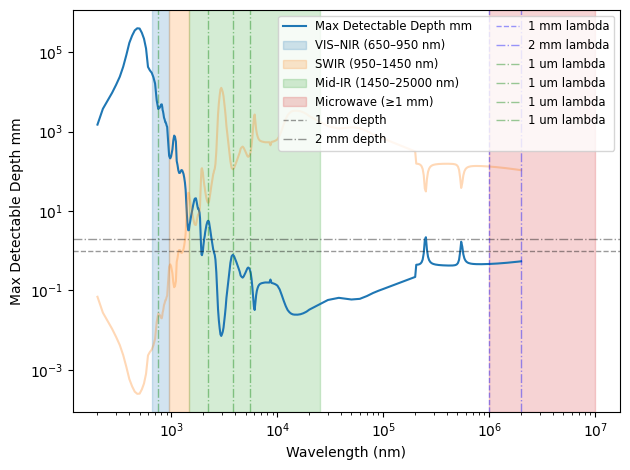

In [71]:
plot_spectrum(depths)

In [57]:
import os
from concurrent.futures import ProcessPoolExecutor, as_completed
# Physical constants
h = 6.62607015e-34  # Planck constant, J·s
c = 2.99792458e8    # Speed of light, m/s

# Tissue baseline temperature
T0 = 310.15         # K (37 °C)

# Arrhenius parameters (example values)
A_arr = 3.1e98      # s⁻¹ (frequency factor)
Ea_arr = 6.28e5     # J/mol (activation energy)
R_gas = 8.314       # J/(mol·K)


arrhenius_threshold = 0.00321 # Equivalent to CEM 43 degrees Celsius for 10 minutes

arrhenius_threshold_pulse = arrhenius_threshold / 100

max_stimulation_per_trial = 16

tau_brain = 2

#           1. Figure out how many logical CPUs (hardware threads) you have:
max_workers = os.cpu_count()   # e.g. 16 on a 8‑core/16‑thread machine
print(f"Detected {max_workers} logical CPUs")
amplitude_grid = np.logspace(18, 25, 6)
pulse_freq_grid = np.logspace(3, 9, 6)
pulse_duration_grid= np.logspace(-14, -9, 6)
# 2. Build the list of argument‑dicts you want to map:
tasks = []
for wavelength, mu_water, mu_skull in water_skull_data.values:
    tasks.append({
        'wavelength': wavelength,
        'amplitude_grid': amplitude_grid,
        'mu_a_brain': mu_water * 100,
        'mu_s_brain_p': 0.9,
        'pulse_freq_grid': pulse_freq_grid,
        'pulse_duration_grid': pulse_duration_grid,
        'skull': True,
        'mu_a_skull': mu_skull * 100,
        'mu_s_skull_p': 0.9,
        'skull_thickness_mm': 5.5,
        'NEP': 1e-14,
        'arrhenius_threshold': arrhenius_threshold,
        'arrhenius_threshold_pulse': arrhenius_threshold_pulse,
        'max_stimulation_per_trial': max_stimulation_per_trial,
        'tau_brain': tau_brain,
        'verbose': False,
        'num_loops': len(water_skull_data['lambda'])
    })



# 3. Spawn a pool of worker processes:
with ProcessPoolExecutor(max_workers=14) as executor:
    futures = [executor.submit(optimize_pulse_schedule, **kw) for kw in tasks]

    results = []
    for future in as_completed(futures):
        try:
            results.append(future.result())
        except Exception as e:
            print("Worker raised:", e)


depths = [result['max_depth_mm'] for result in results]

res_0 = [result['res_0_depth'] for result in results]
res_04 = [result['res_04_depth'] for result in results]
res_max = [result['res_max_depth'] for result in results]

exposures = [result['max_exposure_time'] for result in results]

times = [result['max_time'] for result in results]

Detected 16 logical CPUs


In [58]:
res_0


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [60]:
depths

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

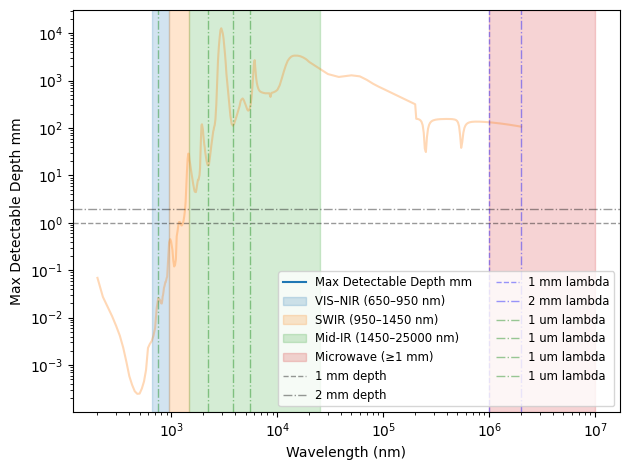

In [59]:

plot_spectrum(depths)

In [ ]:
def get_thermal_coefficient(
    mu_a: float,
    rho: float = 1040,
    c_p: float = 3650
) -> float:
    """
    Compute thermal coefficient for brain tissue that converts irradiance to
    heating rate (dT/dt) per unit irradiance [K per (W/m²·s)].

    Parameters
    ----------
    mu_a : float
        Absorption coefficient at the wavelength of interest [m⁻¹].
    rho : float
        Tissue density [kg/m³]. Default ~1040 for brain.
    c_p : float
        Specific heat capacity [J/(kg·K)]. Default ~3650 for brain.

    Returns
    -------
    thermal_coeff : float
        Heating rate per irradiance [K/(W/m²·s)].
    """
    # dT/dt = mu_a * I / (rho * c_p)  => thermal_coeff = mu_a/(rho*c_p)
    return mu_a / (rho * c_p)



def max_detectable_depth(
    I0: float,
    exposure_time: float,
    mu_a_brain: float,
    mu_s_prime_brain: float,
    skull: bool = False,
    mu_a_skull: float = None,
    mu_s_prime_skull: float = None,
    skull_thickness_mm: float = 6,
    NEP: float = 1e-14,
    pulse_snr_boost: float = None,
    threshold_signal: float = None
) -> dict:
    """
    Estimate the maximum one-way brain depth at which a returned optical signal
    remains above the detection threshold of a modern photodetector.

    Parameters
    ----------
    I0 : float
        Incident irradiance (power per area) on tissue [W/m²].
    exposure_time : float
        Total exposure/integration time [s].
    mu_a_brain : float
        Brain absorption coefficient at the wavelength of interest [m⁻¹].
    skull : bool, optional
        Whether to include skull attenuation (default: False).
    mu_a_skull : float, optional
        Skull absorption coefficient [m⁻¹] (required if skull=True).
    skull_thickness_mm : float, optional
        Skull thickness [mm] (required if skull=True).
    NEP : float, optional
        Noise Equivalent Power of detector [W/√Hz] (default 1e-12 W/√Hz citeturn0search4).
    threshold_signal : float, optional
        Absolute minimum detectable signal energy per unit area [J/m²].
        If None, computed from NEP and exposure_time:
            noise_bandwidth ≈ 1 / exposure_time  [Hz]
            threshold_power = NEP * √noise_bandwidth  [W/m²]
            threshold_signal = threshold_power * exposure_time  [J/m²]

    Returns
    -------
    dict
        - max_depth_mm: maximum detectable one-way depth [mm]
        - threshold_signal_J_m2: signal-energy threshold used [J/m²]
        - F_skull: round-trip skull transmission factor (if skull=True)
        - status: "OK" or reason why no detection possible
    """
    # Compute or validate threshold_signal [J/m²]
    if threshold_signal is None:
        # Approximate noise-equivalent minimum detectable power [W/m²]
        noise_bandwidth = 1.0 / exposure_time
        threshold_power = NEP * np.sqrt(noise_bandwidth)
        threshold_signal = threshold_power * exposure_time

    if pulse_snr_boost is not None:
        threshold_signal   = threshold_signal / pulse_snr_boost
                

    # Compute round-trip skull factor
    F_skull = 1.0
    if skull:
        if mu_a_skull is None or skull_thickness_mm is None:
            raise ValueError("mu_a_skull and skull_thickness_mm must be set if skull=True.")
        skull_thickness_m = skull_thickness_mm * 1e-3
        # Round-trip through skull
        F_skull = np.exp(-2 * mu_a_skull * skull_thickness_m)

    # Compute total incident energy per area
    E_incident = I0 * exposure_time  # [J/m²]

    # Check if any detection is possible
    if E_incident * F_skull <= threshold_signal:
        return {
            "max_depth_mm": 0.0,
            "threshold_signal_J_m2": threshold_signal,
            "F_skull": F_skull,
            "status": "No depth: incident×skull < threshold"
        }

    # Solve for depth: E_signal(depth) = E_incident * F_skull * exp(-2 μ_a_brain d) ≥ threshold_signal
    # ⇒ exp(-2 μ_a_brain d) ≥ threshold_signal / (E_incident * F_skull)
    frac_required = threshold_signal / (E_incident * F_skull)
    max_depth_m = -np.log(frac_required) / (2 * mu_a_brain)
    max_depth_mm = max_depth_m * 1e3

    return {
        "max_depth_mm": max_depth_mm,
        "threshold_signal_J_m2": threshold_signal,
        "F_skull": F_skull,
        "status": "OK"
    }


def optimize_pulse_schedule(
    wavelength: float,
    amplitude_grid: np.ndarray,
    mu_a_brain: float,
    mu_s_brain_p: float,
    pulse_freq_grid = np.logspace(3, 9, 50),
    pulse_duration_grid= np.logspace(-14, -9, 50),
    skull: bool = False,
    mu_a_skull: float = None,
    mu_s_skull_p: float = None,
    skull_thickness_mm: float = None,
    NEP: float = 1e-14,
    arrhenius_threshold: float = 0.00321,
    arrhenius_threshold_pulse: float = None,
    max_stimulation_per_trial: float = 8.,
    tau_brain: float = 2.,
    verbose: bool = False,
    num_loops: int = None
) -> dict:
    """
    Optimize pulse amplitude & repetition rate for maximum penetration depth
    under an Arrhenius damage limit, accounting for wavelength-specific
    absorption in thermal modeling.

    Parameters
    ----------
    wavelength : float
        Laser wavelength (m).
    amplitude_grid : array-like
        Photon flux values to test [photons/m²/s].
    pulse_freq_grid : array-like
        Laser repetition rates to test (Hz).
    duty : float
        Fraction of each cycle the laser is ON (0 < duty ≤ 1).
    mu_a_brain : float
        Brain absorption coefficient at this wavelength [m⁻¹].
    skull, mu_a_skull, skull_thickness_mm, NEP : see depth function.
    arrhenius_threshold : float
        Maximum allowed Arrhenius damage integral Ω.
    max_time : float
        Upper cap on exposure time (s).

    Returns
    -------
    dict
        {
          'optimal_amplitude': float,  # photon flux
          'optimal_freq': float,       # Hz
          'optimal_duty': float,
          'max_exposure_time': float,
          'max_depth_mm': float,
          'omega': float
        }
    """
    if arrhenius_threshold_pulse is None:
        arrhenius_threshold_pulse = arrhenius_threshold



    best = {
        'optimal_amplitude': None,
        'optimal_freq':      None,
        'max_exposure_time': 0.0,
        'max_depth_mm':      0.0,
        'omega':             None,
        'max_trials':          0,
        'max_time':            0,
        'res_0_depth':         0,
        'res_04_depth':         0,
        'res_max_depth':         0
    }

    Ω_threshold = arrhenius_threshold
    Ω_threshold_pulse = arrhenius_threshold_pulse

    # Photon energy (J per photon)
    E_photon      = h * c / wavelength
    thermal_coeff = get_thermal_coefficient(mu_a_brain)

    idx_max = len(amplitude_grid) * len(pulse_freq_grid) * len(pulse_duration_grid)
    # Sweep amplitude and repetition rate
    for amplitude in amplitude_grid:

        I0_peak = amplitude * E_photon  # surface irradiance [W/m²]

        for freq in pulse_freq_grid:

            for idx, pulse_dt in enumerate(pulse_duration_grid):

                if idx == 0 and verbose:
                    before = time.time()

                # Compute pulse on-time
                if pulse_dt * freq > 1:
                    print('A pulse duration is too long to fit a second a the given freq')
                    continue

                average_time_on   = pulse_dt * freq         # s

                # Average Irradiance at brain surface
                I0_avg = I0_peak * average_time_on  

                dT_peak = I0_peak * thermal_coeff

                T_pulse_increase = dT_peak * pulse_dt

              

                T0 = 309.85

                T = T0

                # dt_off = (freq * pulse_dt) / (freq-1)

                period = 1.0/freq
                dt_off = period - pulse_dt


                N_max = max_stimulation_per_trial * freq

                t_max = 0

                Ω_pulse = 0

                #for cycle in range(int(N_max)):
                N_cycles_used = 0
                for cycle in range(int(N_max )):
                    
                    N_cycles_used += 1


                    # 1) Heat: assume nearly constant T during the short on‐pulse
                   
                    T += T_pulse_increase

                    t_max += pulse_dt
                    
                    # Integrate Arrhenius over the on‐time
                    k_on = A_arr * exp(-Ea_arr/(R_gas * T))  #TODO check R gas
                    Ω_pulse += k_on * pulse_dt
                    
                    # Break if damage limit reached
                    if Ω_pulse >= Ω_threshold_pulse:
                        break
                    
                    # 2) Cool during the off‐time (exponential decay toward baseline)
                    T = T0 + (T - T0) * exp(-dt_off / tau_brain)
                
                max_trials = Ω_threshold / Ω_pulse

                snr_boost   = np.sqrt(N_cycles_used)

                # Compute penetration depth

                noise_bandwidth = 1.0 / t_max
                threshold_power = NEP * np.sqrt(noise_bandwidth)
                threshold_signal = threshold_power * t_max

       
                res   = max_detectable_depth(
                    I0_avg, t_max, mu_a_brain,  # Should I use I0_avg here or something else?
                    skull, mu_a_skull, skull_thickness_mm,
                    NEP, snr_boost, threshold_signal=threshold_signal
                )
                depth = res['max_depth_mm']

                res_0_depth = get_resolution(I0_avg, t_max, threshold_signal, snr_boost,
                                mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,
                                   skull_thickness_mm,
                                    depth_mm = 0.0, NEP = 1e-14)
                
                if depth>=0.4:

                    res_04_depth = get_resolution(I0_avg, t_max, threshold_signal, snr_boost,
                                mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,
                                   skull_thickness_mm,
                                    depth_mm = 0.4, NEP = 1e-14)
                else:
                    res_04_depth = 0

                res_max_depth = get_resolution(I0_avg, t_max, threshold_signal, snr_boost,
                                mu_a_brain, mu_s_brain_p, mu_a_skull, mu_s_skull_p,
                                   skull_thickness_mm,
                                    depth_mm = depth, NEP = 1e-14)
         

                # Update if improved
                if depth > best['max_depth_mm']:
                    best.update({
                        'optimal_amplitude': amplitude,
                        'optimal_freq':      freq,
                        'max_exposure_time': t_max,
                        'max_depth_mm':      depth,
                        'omega':             Ω_pulse,
                        'max_trials':       max_trials,
                        'max_time':         max_trials * max_stimulation_per_trial,
                        'res_0_depth':         res_0_depth,
                        'res_04_depth':         res_04_depth,
                        'res_max_depth':         res_max_depth
                    })

                if idx == 0 and verbose:
                    comp_duration = time.time() - before
                    print(f"Cycle duration is {comp_duration} seconds")

                    print(f"Expected total compute duration is {idx_max * comp_duration * num_loops // 60 / 60} hours, or {idx_max * comp_duration * num_loops // 60 } minutes")
                    verbose = False

    return best